<a href="https://colab.research.google.com/github/CameronKenworthyCode/python/blob/main/cameronkenworthy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Initialization

In [ ]:
# Loading all the libraries
import pandas as pd
import numpy as np
import random


### Load data

In [ ]:
# Load the data file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/EDA project/vehicles_us.csv')

df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


In [ ]:
# print the general/summary information about the DataFrame
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None
               price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009

In [ ]:
# print a sample of data
df.sample(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
41268,19998,2012.0,ford f-150,excellent,6.0,gas,113000.0,automatic,pickup,red,1.0,2019-01-19,43
49616,5100,2006.0,chevrolet impala,excellent,6.0,gas,76000.0,automatic,sedan,blue,NaN,2019-03-02,9
51034,14950,2013.0,chevrolet silverado 1500,excellent,8.0,gas,140303.0,automatic,truck,white,1.0,2018-12-02,13
36821,12200,2007.0,chevrolet silverado 1500,good,8.0,gas,194000.0,automatic,truck,white,1.0,2018-11-18,94
43459,16997,NaN,ford edge,excellent,4.0,gas,72757.0,automatic,SUV,black,NaN,2019-04-03,32
47274,5500,2011.0,nissan rogue,good,4.0,gas,100000.0,automatic,SUV,white,NaN,2018-10-10,8
23363,1,2018.0,ram 3500,excellent,10.0,gas,8530.0,other,truck,white,1.0,2018-12-08,60
38152,19985,2010.0,toyota tundra,excellent,8.0,gas,145.0,automatic,truck,white,1.0,2019-03-02,22
18996,19995,2016.0,honda odyssey,excellent,6.0,gas,30472.0,automatic,van,white,NaN,2018-09-19,59
43853,29985,2016.0,toyota 4runner,like new,6.0,gas,64773.0,automatic,SUV,NaN,1.0,2018-05-11,47


<div class='alert alert-info'> Sometimes price is listed as 1 which seems wrong, model seems to include the manufacturer, price seems very directly related to condition

<div class='alert alert-info'> is_4wd should be boolean and not float, model_year should be converted to int, cylinders should be int

<div class='alert alert-info'>model_year, cylinders, odometer, paint_color, and is_4wd are all missing values. They are missing several thousand values each, except for is_4wd which is missing about half of all values.

In [ ]:
df.corr(method='pearson')

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,NaN,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,NaN,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,NaN,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,NaN,0.003804
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.000682,-0.005703,0.005517,0.003804,NaN,1.000000


<div class='alert alert-info'> no corellation is strong enough to use straight forward regression. Instead i'll do a sort of clustering

### Conclusions and further steps


<div class='alert alert-info'> The newer, less miles, and better condition a vehicle is are the obvious determining factors for price. It should be investigated if prices seem to decrease with the amount of days listed perhaps the seller can reprice if it does not sell after a certain amount of time. 
    
I need to determine if there are several listings of the same model of vehicle, this will be useful with filling in missing data
    
Color as a missing value may not be important to price, but an investigation into color's relation to price should be conducted to make sure </div>

## Treat missing values

In [ ]:
#will be very useful
#will help to avoid outlier pitfalls
def listing_group(column_list, row, dataframe, price_floor=.8, price_ceil=1.2, odometer_floor=.9, odometer_ceil=1.1):
  data = dataframe.copy()
  for column in column_list:
    if column == 'price': #return listings within a given range of price
      price_floor_ = round(row['price']*price_floor, -3)
      price_ceil_ = round(row['price']*price_ceil, -3)
      if row['price'] < 10000: #exceptionally low price
        price_floor_ = 0
        price_ceil_ = 50000
      data = data.query('@price_floor_ < price < @price_ceil_')
      continue
    if column == 'odometer': #return listings within a given range of odometer
      odometer_floor_ = round(row['odometer']*odometer_floor, -4)
      odometer_ceil_ = round(row['odometer']*odometer_ceil, -4)
      if row['odometer'] < 10000: #exceptionally low mileage
        odometer_floor_ = 0
        odometer_ceil_ = 500000
      data = data.query('@odometer_floor_ < odometer < @odometer_ceil_')
      continue
    data = data[data[column] == row[column]]
  return data
#returns groups of similar listings given one listing, pass it the columns you want to match

In [ ]:
df.iloc[1500]

price                27950
model_year          2017.0
model           ford f-250
condition        excellent
cylinders              8.0
fuel                   gas
odometer           80982.0
transmission     automatic
type                 truck
paint_color            NaN
is_4wd                 1.0
date_posted     2019-01-05
days_listed             66
Name: 1500, dtype: object

In [ ]:
listing_group(['price', 'model_year', 'model', 'condition', 'cylinders', 'odometer'], df.iloc[1500], df, price_floor=.5, odometer_floor=.5, odometer_ceil=2)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1500,27950,2017.0,ford f-250,excellent,8.0,gas,80982.0,automatic,truck,NaN,1.0,2019-01-05,66
20781,25900,2017.0,ford f-250,excellent,8.0,gas,109366.0,automatic,pickup,red,1.0,2018-08-23,31
32463,25900,2017.0,ford f-250,excellent,8.0,gas,109366.0,automatic,pickup,red,1.0,2018-06-04,43


###'is_4wd'

In [ ]:
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [ ]:
df[df['is_4wd'] == 1.0]['type'].value_counts()

truck          9357
SUV            8853
pickup         5026
wagon          1073
sedan           563
offroad         206
hatchback       160
other           126
coupe            76
convertible      53
van              40
mini-van         39
Name: type, dtype: int64

In [ ]:
df[df['is_4wd'].isna() == True]['type'].value_counts() #looks like those with NaN values are the type of vehicles that aren't usually 4wd

sedan          11591
SUV             3552
truck           2996
coupe           2227
pickup          1962
mini-van        1122
hatchback        887
van              593
wagon            468
convertible      393
other            130
bus               24
offroad            8
Name: type, dtype: int64

<div class='alert alert-info'> assumption: all values filled for is_4wd are given as '1.0' or affirmative. Perhaps all NaN values should be 0.0 or negative, this makes sense as its roughly half the dataset, and about half of all vehicles are 4wd

In [ ]:
df['is_4wd'] = df['is_4wd'].fillna(0.0)
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

###'cylinders'

In [ ]:
df.corr(method='pearson')

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,0.315145,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,0.043384,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,0.405770,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,0.036267,0.003804
is_4wd,0.315145,0.043384,0.405770,0.036267,1.000000,0.002003
days_listed,-0.000682,-0.005703,0.005517,0.003804,0.002003,1.000000


<div class='alert alert-info'> cylinders appears to have a correlation with is_4wd

In [ ]:
df[df['is_4wd'] == 1.0]['cylinders'].value_counts()

8.0     11365
6.0      8144
4.0      2964
10.0      436
5.0        76
3.0         6
12.0        2
Name: cylinders, dtype: int64

In [ ]:
df[df['is_4wd'] == 0.0]['cylinders'].value_counts()

4.0     10900
6.0      7556
8.0      4479
5.0       196
10.0      113
3.0        28
Name: cylinders, dtype: int64

<div class='alert alert-info'> assumption: for each row missing a cylinder value, we can fill in this value with the most common cylinder count for the group of similar model_year/model/transmission/is_4wd

In [ ]:
cylinder_mode = [] 
missing_cylinders = df[df['cylinders'].isna() == True]
missing_cylinders
failed = []
for i in range(len(missing_cylinders)):
  group = listing_group(['model_year', 'model', 'transmission', 'is_4wd'], missing_cylinders.iloc[i], df)
  try:
    cylinder_mode.append([missing_cylinders.index[i], group['cylinders'].mode()[0]])
  except: #there weren't group entries for 'cylinders'
    #expand group search to not require same year
    group = listing_group(['model_year', 'model', 'is_4wd'], missing_cylinders.iloc[i], df)
    try:
      cylinder_mode.append([missing_cylinders.index[i], group['cylinders'].mode()[0]])
    except:
      group = listing_group(['model', 'is_4wd'], missing_cylinders.iloc[i], df)
      try:
        cylinder_mode.append([missing_cylinders.index[i], group['cylinders'].mode()[0]])
      except:#save the index to look at later
        failed.append(missing_cylinders.index[i])
print('could not find modes for')
df.iloc[failed].head(len(failed))

could not find modes for


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33953,3000,2007.0,nissan maxima,excellent,NaN,gas,134657.0,automatic,sedan,silver,1.0,2018-12-15,16


In [ ]:
#go to each index in df and update cylinder value
for i in range(len(cylinder_mode)):
  df.at[cylinder_mode[i][0], ['cylinders']] = cylinder_mode[i][1]

<div class='alert alert-info'> just one straggler to look at, df.iloc[33953]

In [ ]:
listing_group(['model', 'model_year'], df.iloc[33953], df)['cylinders'].value_counts()

6.0    13
Name: cylinders, dtype: int64

In [ ]:
#looks like all other 2007 nissan maximas are 6 cylinder, so we'll go with that

df.at[33953, ['cylinders']] = 6.0

df[df['cylinders'].isna() == True].head() #all done

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


###'model_year'

In [ ]:
missing_model_year = df[(df['model_year'].isna() == True)]

#missing model year not odometer
mmy_no = missing_model_year[missing_model_year['odometer'].isna() == False]

print('Missing year:', len(missing_model_year))
print('Missing year but also has odometer:', len(mmy_no))

Missing year: 3619
Missing year but also has odometer: 3070


<div class='alert alert-info'> looks like there are about 500 rows without odometer or year, we'll deal with the 3070 first

<div class='alert alert-info'> assumption: within a similar odometer range, the value of a vehicle increases inversely to age, therefore we can assume a vehicle's year is between a lower priced similar listing and a higher priced similar listing

In [ ]:
year_guess = []
failed = []
for i in range(len(mmy_no)):
  group = listing_group(['price', 'odometer', 'model', 'condition', 'cylinders', 'is_4wd'], mmy_no.iloc[i], df)
  if len(group) > 5:
    guess = round(group['model_year'].median())
    year_guess.append([mmy_no.index[i], guess])
  else:#too few results, expand search
    group = listing_group(['price', 'odometer', 'model', 'condition', 'cylinders', 'is_4wd'], mmy_no.iloc[i], df, price_floor=.7, price_ceil=1.3, odometer_floor=.8, odometer_ceil=1.2)
    if len(group) > 2:
      guess = round(group['model_year'].median())
      year_guess.append([mmy_no.index[i], guess])
    else:#too few results, expand search
      group = listing_group(['price', 'odometer', 'model', 'condition', 'cylinders', 'is_4wd'], mmy_no.iloc[i], df, price_floor=.6, price_ceil=1.4, odometer_floor=.7, odometer_ceil=1.3)
      if len(group) > 2:
        guess = round(group['model_year'].median())
        year_guess.append([mmy_no.index[i], guess])
      else:#go for broke
        group = listing_group(['price', 'odometer', 'model', 'condition'], mmy_no.iloc[i], df, price_floor=0, price_ceil=1.8, odometer_floor=0, odometer_ceil=1.8)
        try:
          guess = round(group['model_year'].median())
          year_guess.append([mmy_no.index[i], guess])
        except: #still no results
          #maybe the odometer is whack
          group = listing_group(['price', 'model', 'condition'], mmy_no.iloc[i], df, price_floor=0, price_ceil=1.8)
          try:
            guess = round(group['model_year'].median())
            year_guess.append([mmy_no.index[i], guess])
          except: #still no results
            #maybe the price is whack
            group = listing_group(['odometer', 'model', 'condition'], mmy_no.iloc[i], df, odometer_floor=0, odometer_ceil=1.8) 
            try:
              guess = round(group['model_year'].median())
              year_guess.append([mmy_no.index[i], guess])
            except:
              #maybe both are whack
              group = listing_group(['model', 'condition'], mmy_no.iloc[i], df)
              try:
                guess = round(group['model_year'].median())
                year_guess.append([mmy_no.index[i], guess])
              except: #just give it the median year of that model
                group = listing_group(['model'], mmy_no.iloc[i], df)
                try:
                  guess = round(group['model_year'].median())
                  year_guess.append([mmy_no.index[i], guess])
                except: #give up, add to failed
                  failed.append(mmy_no.index[i])

df.iloc[failed].head(len(failed))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [ ]:
#replace nan with our guessed values
for i in range(len(year_guess)):
  df.at[year_guess[i][0], 'model_year'] = year_guess[i][1]

In [ ]:
mmy = df[df['model_year'].isna() == True]
mmy #missing_model_year

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,6.0,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,0.0,2018-05-13,57
370,4700,NaN,kia soul,good,4.0,gas,NaN,manual,sedan,white,0.0,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,NaN,0.0,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,NaN,0.0,2018-10-22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,0.0,2018-12-09,23
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,0.0,2018-10-16,75
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-16,83


<div class='alert alert-info'> now all we have to go off of is price similarites, so I'll do that now

In [ ]:
year_guess = []
failed = []
for i in range(len(mmy)):
  group = listing_group(['price', 'model', 'condition', 'is_4wd'], mmy.iloc[i], df)
  try:
    guess = round(group['model_year'].median())
    year_guess.append([mmy.index[i], guess])
  except: #no matches
    group = listing_group(['price', 'model', 'condition', 'cylinders', 'is_4wd'], mmy.iloc[i], df, price_floor=.7, price_ceil=1.3)
    try:
      guess = round(group['model_year'].median())
      year_guess.append([mmy.index[i], guess])
    except: #no matches
      group = listing_group(['price', 'model', 'condition', 'cylinders', 'is_4wd'], mmy.iloc[i], df, price_floor=.6, price_ceil=1.4)
      try:
        guess = round(group['model_year'].median())
        year_guess.append([mmy.index[i], guess])
      except:
        group = listing_group(['price', 'model', 'condition', 'cylinders', 'is_4wd'], mmy.iloc[i], df, price_floor=0, price_ceil=5)
        try:
          guess = round(group['model_year'].median())
          year_guess.append([mmy.index[i], guess])
        except:#accept failure
          failed.append(mmy.index[i])

df.iloc[failed].head(len(failed))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
27192,1200,NaN,toyota rav4,salvage,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21


In [ ]:
#deal with the one remaning row that didn't work
listing_group(['price', 'model', 'cylinders', 'is_4wd'], df.iloc[27192], df, price_ceil=2)
#we'll just go with year 2000

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
27192,1200,NaN,toyota rav4,salvage,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
40584,1500,2001.0,toyota rav4,fair,4.0,gas,NaN,manual,SUV,blue,1.0,2018-12-20,14
41241,1400,2000.0,toyota rav4,good,4.0,gas,129.0,automatic,SUV,white,1.0,2018-12-10,31


In [ ]:
year_guess.append([27192, 2000])

for i in range(len(year_guess)):
  df.at[year_guess[i][0], 'model_year'] = year_guess[i][1]

In [ ]:
df[df['model_year'].isna() == True]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


###'odometer'

In [ ]:
df.corr(method='pearson')

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.433389,0.295114,-0.420299,0.315145,-0.000682
model_year,0.433389,1.000000,-0.149895,-0.479434,0.040470,-0.004679
cylinders,0.295114,-0.149895,1.000000,0.090717,0.407085,0.003946
odometer,-0.420299,-0.479434,0.090717,1.000000,0.036267,0.003804
is_4wd,0.315145,0.040470,0.407085,0.036267,1.000000,0.002003
days_listed,-0.000682,-0.004679,0.003946,0.003804,0.002003,1.000000


<div class='alert alert-info'> looks like the strongest correlation that odometer has are negative correlations to price and the year (aka older cars have more miles). So that's what we'll go off of.

In [ ]:
missing_odometer = df[df['odometer'].isna() == True]
missing_odometer

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,0.0,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,0.0,2018-11-24,89


In [ ]:
odometer_guesses = []
failed = []
#increasingly widen the search parameters if no similar listings with filled odometer values are found
for i in range(len(missing_odometer)):
  group = listing_group(['price', 'model_year', 'model', 'condition'], missing_odometer.iloc[i], df)
  guess = group['odometer'].mean()
  if pd.isna(guess) == False:
    odometer_guesses.append([missing_odometer.index[i], guess])
  else:
    group = listing_group(['price', 'model_year', 'model', 'condition'], missing_odometer.iloc[i], df, price_floor=.7, price_ceil=1.4)
    guess = group['odometer'].mean()
    if pd.isna(guess) == False:
      odometer_guesses.append([missing_odometer.index[i], guess])
    else:
      group = listing_group(['price', 'model_year', 'model', 'condition'], missing_odometer.iloc[i], df, price_floor=.5, price_ceil=1.8)
      guess = group['odometer'].mean()
      if pd.isna(guess) == False:
        odometer_guesses.append([missing_odometer.index[i], guess])
      else:
        group = listing_group(['price', 'model_year', 'model', 'condition'], missing_odometer.iloc[i], df, price_floor=.3, price_ceil=2)
        guess = group['odometer'].mean()
        if pd.isna(guess) == False:
          odometer_guesses.append([missing_odometer.index[i], guess])
        else:
          group = listing_group(['price', 'model_year', 'model', 'condition'], missing_odometer.iloc[i], df, price_floor=.1, price_ceil=3)
          guess = group['odometer'].mean()
          if pd.isna(guess) == False:
            odometer_guesses.append([missing_odometer.index[i], guess])
          else:
            group = listing_group(['price', 'model_year', 'model', 'condition'], missing_odometer.iloc[i], df, price_floor=0, price_ceil=4)
            guess = group['odometer'].mean()
            if pd.isna(guess) == False:  
              odometer_guesses.append([missing_odometer.index[i], guess])
            else:
              group = listing_group(['price', 'model_year', 'model'], missing_odometer.iloc[i], df, price_floor=.5, price_ceil=2)
              guess = group['odometer'].mean()
              if pd.isna(guess) == False:  
                odometer_guesses.append([missing_odometer.index[i], guess])
              else:
                group = listing_group(['price', 'condition', 'model'], missing_odometer.iloc[i], df)
                guess = group['odometer'].mean()
                if pd.isna(guess) == False:  
                  odometer_guesses.append([missing_odometer.index[i], guess])
                else:
                  group = listing_group(['price', 'condition', 'model'], missing_odometer.iloc[i], df, price_floor=0, price_ceil=5)
                  guess = group['odometer'].mean()
                  if pd.isna(guess) == False:  
                    odometer_guesses.append([missing_odometer.index[i], guess])
                  else:
                    failed.append(missing_odometer.index[i])

df.iloc[failed].head(len(failed))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-01-15,16
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-12-04,36
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-08-23,70
2731,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-04-12,31
4149,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-10-12,28
4681,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,0.0,2018-10-02,32
5681,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-12-11,34
6930,12,2018.0,nissan versa,new,4.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-26,24
8975,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,0.0,2018-09-24,45
10600,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-09-16,47


In [ ]:
for i in range(len(odometer_guesses)):
  df.at[odometer_guesses[i][0], 'odometer'] = odometer_guesses[i][1]

In [ ]:
#time to get rid of the stragglers
missing_odometer = df[df['odometer'].isna() == True]
odometer_guesses = []
failed = []
#increasingly widen the search parameters if no similar listings with filled odometer values are found
for i in range(len(missing_odometer)):
  group = listing_group(['price', 'model_year', 'condition'], missing_odometer.iloc[i], df)
  guess = group['odometer'].mean()
  if pd.isna(guess) == False:
    odometer_guesses.append([missing_odometer.index[i], guess])
  else:
    failed.append(missing_odometer.index[i])

df.iloc[failed].head(len(failed))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [ ]:
for i in range(len(odometer_guesses)):
  df.at[odometer_guesses[i][0], 'odometer'] = odometer_guesses[i][1]

In [ ]:
df[df['odometer'].isna() == True]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


###'paint_color'

#### What is the relative value of each color

hypothesis: humans like pretty/rare colors

In [ ]:
df.corr(method='pearson')

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.433389,0.295114,-0.422429,0.315145,-0.000682
model_year,0.433389,1.000000,-0.149895,-0.493122,0.040470,-0.004679
cylinders,0.295114,-0.149895,1.000000,0.094404,0.407085,0.003946
odometer,-0.422429,-0.493122,0.094404,1.000000,0.034908,0.003877
is_4wd,0.315145,0.040470,0.407085,0.034908,1.000000,0.002003
days_listed,-0.000682,-0.004679,0.003946,0.003877,0.002003,1.000000


In [ ]:
#make list of groups of at least 20 similar listings that can be used to check relative color value

similar = df.drop(columns=['price', 'odometer', 'date_posted', 'days_listed', 'paint_color', 'fuel', 'transmission', 'type']) #create a dataframe without entirely specific values
x = similar.value_counts() >= 20
#create a list of any rows with similar listings 
groups = [list(x.index[i]) for i in range(len(x)) if x[x.index[i]] == True]

groups = pd.DataFrame(data=groups, columns=['model_year', 'model', 'condition', 'cylinders', 'is_4wd'])
groups.sample(10)
#can now be iterated through to check all similar listing groups of significant size

,model_year,model,condition,cylinders,is_4wd
368,2011.0,toyota corolla,excellent,4.0,0.0
362,2017.0,subaru outback,excellent,4.0,1.0
67,2012.0,ram 2500,excellent,6.0,1.0
334,2015.0,ford f150 supercrew cab xlt,good,6.0,1.0
263,2012.0,ram 1500,good,8.0,1.0
261,2014.0,ford escape,excellent,4.0,1.0
240,2013.0,toyota corolla,excellent,4.0,0.0
234,2008.0,honda odyssey,excellent,6.0,0.0
186,2013.0,chevrolet malibu,good,4.0,0.0
320,2013.0,ford mustang,excellent,6.0,0.0


In [ ]:
len(groups) #we have about 500 groups to work with to determine relative color value

482

,count,raw_score,combined_score
custom,246,54.716727,0.222426
orange,50,9.859305,0.197186
yellow,72,13.756620,0.191064
red,1041,190.676061,0.183166
purple,10,1.762564,0.176256
blue,1077,185.677883,0.172403
brown,254,43.297679,0.170463
grey,1338,196.418792,0.146800
silver,1506,216.652427,0.143860
green,238,33.437906,0.140495


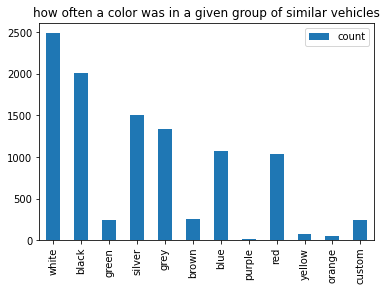

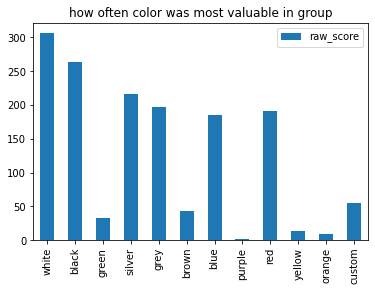

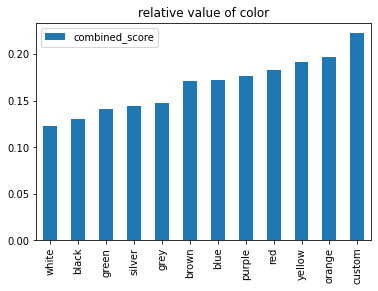

In [ ]:
#break down each group into similar odometer ranges, then determine the relative value of each color
keys = list(df['paint_color'].value_counts().index)
color_entries = list([0]*len(keys))
color_score = dict(zip(keys, color_entries)) #create dict that will keep track of color_price score
color_count = dict(zip(keys, color_entries)) #create dict that will keep track of number of occurences of each color
#{'white': 0, 'black': 0, 'silver': 0, 'grey': 0, 'blue': 0, 'red': 0, 'green': 0, 'brown': 0, 'custom': 0, 'yellow': 0, 'orange': 0, 'purple': 0}
groups_evaluated = 0

for i in range(len(groups)):
  group = listing_group(['model_year', 'model', 'condition', 'cylinders', 'is_4wd'], groups.iloc[i], df)

  #get odometer quartile ranges
  Q1 = range(int(group['odometer'].quantile(0)), int(group['odometer'].quantile(.25)))
  Q2 = range(int(group['odometer'].quantile(.25)), int(group['odometer'].quantile(.5)))
  Q3 = range(int(group['odometer'].quantile(.5)), int(group['odometer'].quantile(.75)))
  Q4 = range(int(group['odometer'].quantile(.75)), int(group['odometer'].quantile(1)))

  #create 4 subsets of group based on odometer ranges
  Q1_group = group.query('odometer in @Q1')
  for j in range(len(Q1_group['paint_color'].value_counts())): #tabulate how many of each color was in subgroup
    color_count[Q1_group['paint_color'].value_counts().index[j]] += Q1_group['paint_color'].value_counts()[j]
  Q2_group = group.query('odometer in @Q2')
  for j in range(len(Q2_group['paint_color'].value_counts())): #tabulate how many of each color was in subgroup
    color_count[Q2_group['paint_color'].value_counts().index[j]] += Q2_group['paint_color'].value_counts()[j]
  Q3_group = group.query('odometer in @Q3')
  for j in range(len(Q3_group['paint_color'].value_counts())): #tabulate how many of each color was in subgroup
    color_count[Q3_group['paint_color'].value_counts().index[j]] += Q3_group['paint_color'].value_counts()[j]
  Q4_group = group.query('odometer in @Q4')
  for j in range(len(Q4_group['paint_color'].value_counts())): #tabulate how many of each color was in subgroup
    color_count[Q4_group['paint_color'].value_counts().index[j]] += Q4_group['paint_color'].value_counts()[j]

  #calculate scores and store them in corresponding color entry in color_score dict
  #score = color's average price / higest average color price
  
  cutoff = 8 #minimum number of listings for score calculation to be valid
  if len(Q1_group) >= cutoff:
    try:
      Q1_scores = Q1_group.pivot_table(index='paint_color', values='price', aggfunc='mean').sort_values(by='price', ascending=False)
      for j in range(len(Q1_scores)):
        color_score[Q1_scores.index[j]] += (Q1_scores['price'][j]/Q1_scores['price'][0])
      groups_evaluated += 1
    except: #all NaN values
      #for debugging
      print(i,'Q1 :', len(Q1_group), groups.iloc[i]['model_year'], groups.iloc[i]['model'], groups.iloc[i]['condition'], groups.iloc[i]['cylinders'], groups.iloc[i]['is_4wd'])
  if len(Q2_group) >= cutoff:
    try:
      Q2_scores = Q2_group.pivot_table(index='paint_color', values='price', aggfunc='mean').sort_values(by='price', ascending=False)
      for j in range(len(Q2_scores)):
        color_score[Q2_scores.index[j]] += (Q2_scores['price'][j]/Q2_scores['price'][0]) 
      groups_evaluated += 1
    except:
      print(i,'Q2 :', len(Q2_group), groups.iloc[i]['model_year'], groups.iloc[i]['model'], groups.iloc[i]['condition'], groups.iloc[i]['cylinders'], groups.iloc[i]['is_4wd'])
  if len(Q3_group) >= cutoff:
    try:
      Q3_scores = Q3_group.pivot_table(index='paint_color', values='price', aggfunc='mean').sort_values(by='price', ascending=False)
      for j in range(len(Q3_scores)):
        color_score[Q3_scores.index[j]] += (Q3_scores['price'][j]/Q3_scores['price'][0])
      groups_evaluated += 1
    except:
      print(i,'Q3 :', len(Q3_group), groups.iloc[i]['model_year'], groups.iloc[i]['model'], groups.iloc[i]['condition'], groups.iloc[i]['cylinders'], groups.iloc[i]['is_4wd'])
  if len(Q4_group) >= cutoff:
    try:
      Q4_scores = Q4_group.pivot_table(index='paint_color', values='price', aggfunc='mean').sort_values(by='price', ascending=False)
      for j in range(len(Q4_scores)):
        color_score[Q4_scores.index[j]] += (Q4_scores['price'][j]/Q4_scores['price'][0])
      groups_evaluated += 1
    except:
      print(i,'Q4 :', len(Q4_group), groups.iloc[i]['model_year'], groups.iloc[i]['model'], groups.iloc[i]['condition'], groups.iloc[i]['cylinders'], groups.iloc[i]['is_4wd'])



color_score_series = pd.Series(color_score, name='raw_score')
color_count_series = pd.Series(color_count, name='count')
color_df = pd.concat([color_count_series.to_frame(), color_score_series.to_frame()], axis=1)
color_df['combined_score'] = (color_df['raw_score'] / color_df['count'])
#color_df['normalized_score'] = (color_df['combined_score']-color_df['combined_score'].min())/(color_df['combined_score'].max()-color_df['combined_score'].min())
color_df.sort_values(by='combined_score').plot(kind='bar', y='count', title='how often a color was in a given group of similar vehicles')
color_df.sort_values(by='combined_score').plot(kind='bar', y='raw_score', title='how often color was most valuable in group')
color_df.sort_values(by='combined_score').plot(kind='bar', y='combined_score', title='relative value of color')
color_df.sort_values(by='combined_score', ascending=False)

<div class='alert alert-info'> After analysis, the relative value of colors is different, but not by much. And not by enough to be much use in guessing the missing paint color. Though it does appear that more vibrant and generally rarer colors are considered slightly more valuable than less vibrant and more common colors.

####guessing missing 'paint_color'

<div class='alert alert-info'> my strategy is to look at groups of model and or model_year. Calculate the distribution of colors within the group, and assign missing paint_color listings a random color based on the given distribution

In [ ]:
missing_color = df[df['paint_color'].isna() == True]
missing_color

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,233000.000000,automatic,pickup,NaN,0.0,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.000000,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.000000,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.000000,automatic,SUV,NaN,0.0,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.000000,automatic,SUV,NaN,0.0,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.000000,automatic,sedan,NaN,0.0,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.000000,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,56074.666667,automatic,coupe,NaN,0.0,2018-11-24,89


In [ ]:
foo = df.drop(columns=['price', 'odometer', 'date_posted', 'days_listed', 'paint_color', 'fuel', 'transmission', 'type']) #create a dataframe without entirely specific values
bar = foo.value_counts()
count = 0
for i in range(len(bar)):
  count += bar[bar.index[i]]

print('average group size:', count/len(bar))
#just curious

average group size: 5.31404702970297


In [ ]:
color_guesses = []
failed = []
for i in range(len(missing_color)):
  #if there are enough listings for a given model_year then use that for distribution
  if len(listing_group(['model', 'model_year'], missing_color.iloc[i], df)) >= 30:
      group = listing_group(['model', 'model_year'], missing_color.iloc[i], df)
      color_count = group['paint_color'].value_counts()
      weights = [(color_count[i]/color_count.sum()) for i in range(len(color_count))]
      colors = list(color_count.index)
      guess = random.choices(colors, weights)[0]
      color_guesses.append([missing_color.index[i], guess])
  
  #if not just use the distribution of all models
  else:
      group = listing_group(['model'], missing_color.iloc[i], df)
      color_count = group['paint_color'].value_counts()
      weights = [(color_count[i]/color_count.sum()) for i in range(len(color_count))]
      colors = list(color_count.index)
      guess = random.choices(colors, weights)[0]
      color_guesses.append([missing_color.index[i], guess])

In [ ]:
#check distribution of guesses to make sure they look correct
print(pd.DataFrame(color_guesses, columns=['index','paint_color'])['paint_color'].value_counts())

white     2196
black     1743
silver    1387
grey      1117
blue       967
red        942
green      293
brown      243
custom     243
orange      63
yellow      54
purple      19
Name: paint_color, dtype: int64


In [ ]:
for i in range(len(color_guesses)):
  df.at[color_guesses[i][0], 'paint_color'] = color_guesses[i][1]

In [ ]:
df[df['paint_color'].isna() == True]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [ ]:
#final check

df.info() #nice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Fix data types

In [ ]:
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
25193,8500,2010.0,ford fusion,excellent,6.0,gas,61800.000000,automatic,sedan,blue,0.0,2019-03-27,50
1938,2900,2002.0,ford f-250,fair,8.0,gas,126000.000000,automatic,truck,white,1.0,2018-11-04,21
18546,21000,2016.0,chevrolet traverse,excellent,6.0,gas,82000.000000,automatic,SUV,silver,1.0,2018-05-25,22
8634,11995,2016.0,ford escape,good,4.0,gas,119507.000000,automatic,SUV,white,0.0,2019-01-22,57
41000,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,157000.000000,automatic,truck,grey,1.0,2018-05-01,30
30263,2900,2005.0,ford f-150,good,8.0,gas,116210.857143,automatic,pickup,white,1.0,2018-07-03,44
24093,29990,2016.0,gmc sierra 1500,like new,8.0,gas,72291.000000,automatic,pickup,black,1.0,2018-12-15,76
9287,2599,2007.0,nissan sentra,good,4.0,gas,149000.000000,automatic,sedan,blue,0.0,2018-12-24,27
2914,16995,2018.0,chevrolet cruze,excellent,4.0,gas,21449.000000,automatic,sedan,white,0.0,2019-02-14,16
14098,8995,2005.0,toyota tundra,good,8.0,gas,138613.285714,automatic,pickup,red,1.0,2018-10-13,27


In [ ]:
#fix year, cylinders, is_4wd being float and also make is_4wd boolean
#convert date_posted to datetime object
df['model_year'] = df['model_year'].apply(int)
df['cylinders'] = df['cylinders'].apply(int)
df['is_4wd'] = df['is_4wd'].apply(int)
df['is_4wd'] = df['is_4wd'].apply(bool)
df['date_posted'] = df['date_posted'].apply(pd.to_datetime)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,grey,True,2018-06-23,19
1,25500,2014,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,233000.0,automatic,pickup,red,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


## Enrich data

In [ ]:
# Add datetime values for when the ad was placed
df.iloc[0]['date_posted'].year

2018

In [ ]:
# Add the vehicle's age when the ad was placed
vehicle_age = []
for i in range(len(df)):
  age = df.iloc[i]['date_posted'].year - df.iloc[i]['model_year']
  vehicle_age.append(age)

df['vehicle_age'] = pd.Series(vehicle_age)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,grey,True,2018-06-23,19,7
1,25500,2014,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6
3,1500,2003,ford f-150,fair,8,gas,233000.0,automatic,pickup,red,False,2019-03-22,9,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2


In [ ]:
# Add the vehicle's average mileage per year
mileage = []
for i in range(len(df)):
  if df.iloc[i]['vehicle_age'] == 0:
    mileage.append(df.iloc[i]['odometer'])
    continue
  value = round(df.iloc[i]['odometer'] / df.iloc[i]['vehicle_age'], 1)
  mileage.append(value)

df['mileage_per_year'] = pd.Series(mileage)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,grey,True,2018-06-23,19,7,20714.3
1,25500,2014,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,22176.2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6,18333.3
3,1500,2003,ford f-150,fair,8,gas,233000.0,automatic,pickup,red,False,2019-03-22,9,16,14562.5
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,40451.5


In [ ]:
# It might help to replace the condition values with something that can be manipulated more easily
print(df['condition'].unique())

condition_dict = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}

condition_id = []
for i in range(len(df)):
  condition_id.append(condition_dict[df.iloc[i]['condition']])

df['condition_id'] = pd.Series(condition_id)
df.head()


['good' 'like new' 'fair' 'excellent' 'salvage' 'new']


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,grey,True,2018-06-23,19,7,20714.3,2
1,25500,2014,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,22176.2,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6,18333.3,4
3,1500,2003,ford f-150,fair,8,gas,233000.0,automatic,pickup,red,False,2019-03-22,9,16,14562.5,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,40451.5,3


In [ ]:
df[df['condition_id'] == 1]['price'].describe()

count      1607.000000
mean       3386.502178
std        4308.814660
min           1.000000
25%        1500.000000
50%        2500.000000
75%        4000.000000
max      123456.000000
Name: price, dtype: float64

## Check clean data

[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

In [ ]:
# print the general/summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  int64         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  vehicle_age       51525 non-null  int64         
 14  mileage_per_year  5152

In [ ]:
df.describe()

,price,model_year,cylinders,odometer,days_listed,vehicle_age,mileage_per_year,condition_id
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.752994,6.119398,115596.648801,39.55476,8.554469,17978.964885,2.637535
std,10040.803015,6.210982,1.659532,63647.801329,28.20427,6.224225,13165.031490,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.00000,-1.000000,-18485.000000,0.000000
25%,5000.000000,2006.000000,4.000000,71558.000000,19.00000,4.000000,10762.300000,2.000000
50%,9000.000000,2011.000000,6.000000,113325.857143,33.00000,7.000000,15112.100000,3.000000
75%,16839.000000,2014.000000,8.000000,154000.000000,53.00000,12.000000,21469.000000,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,110.000000,373200.000000,5.000000


In [ ]:
df.corr(method='pearson')

,price,model_year,cylinders,odometer,is_4wd,days_listed,vehicle_age,mileage_per_year,condition_id
price,1.000000,0.433389,0.295114,-0.422429,0.315145,-0.000682,-0.432117,0.215587,0.221518
model_year,0.433389,1.000000,-0.149895,-0.493122,0.040470,-0.004679,-0.997248,0.470237,0.286095
cylinders,0.295114,-0.149895,1.000000,0.094404,0.407085,0.003946,0.149532,-0.040239,-0.065746
odometer,-0.422429,-0.493122,0.094404,1.000000,0.034908,0.003877,0.491484,0.098722,-0.300956
is_4wd,0.315145,0.040470,0.407085,0.034908,1.000000,0.002003,-0.040568,0.052438,0.012856
days_listed,-0.000682,-0.004679,0.003946,0.003877,0.002003,1.000000,0.005505,-0.001100,-0.002404
vehicle_age,-0.432117,-0.997248,0.149532,0.491484,-0.040568,0.005505,1.000000,-0.478543,-0.285206
mileage_per_year,0.215587,0.470237,-0.040239,0.098722,0.052438,-0.001100,-0.478543,1.000000,0.080335
condition_id,0.221518,0.286095,-0.065746,-0.300956,0.012856,-0.002404,-0.285206,0.080335,1.000000


In [ ]:
# print a sample of data
df.sample(20)
  

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
29077,6500,2007,subaru outback,excellent,4,gas,131.000000,manual,wagon,green,True,2018-11-10,25,11,11.9,3
37480,15900,2010,chevrolet silverado 1500,excellent,8,gas,126000.000000,automatic,truck,red,True,2018-07-08,46,8,15750.0,3
31949,6995,2009,nissan murano,excellent,6,gas,119270.950000,automatic,SUV,white,True,2018-06-18,123,9,13252.3,3
19175,3995,2005,dodge dakota,excellent,6,gas,140605.000000,automatic,pickup,blue,True,2018-07-08,37,13,10815.8,3
18891,6495,2009,toyota rav4,excellent,4,gas,150000.000000,automatic,SUV,grey,True,2018-11-08,50,9,16666.7,3
3056,7990,2012,honda civic lx,excellent,4,gas,48000.000000,automatic,sedan,grey,False,2018-10-21,36,6,8000.0,3
33435,19900,2013,ford f-150,good,6,gas,126006.000000,automatic,truck,silver,True,2019-04-07,36,6,21001.0,2
50640,5500,2009,toyota camry,excellent,4,gas,143002.848485,automatic,sedan,blue,False,2018-12-30,20,9,15889.2,3
43365,16800,2012,toyota 4runner,excellent,6,gas,105293.000000,automatic,SUV,black,True,2018-06-19,24,6,17548.8,3
5378,1990,2004,ford focus,like new,4,gas,123872.000000,manual,hatchback,silver,False,2018-11-23,23,14,8848.0,4


## Study core parameters

[Choose an appropriate approach to study the parameters listed below, pay special attention to how outliers affect the form and readability of the histograms.]

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

###price

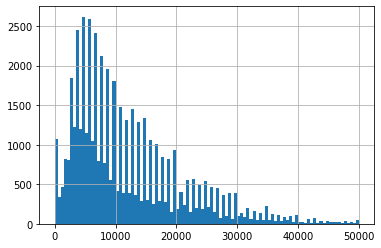

In [ ]:
#
df['price'].hist(bins=100, range=(0, 50000))

<div class='alert alert-info'> there appears to be an unusual spike at 1$

In [ ]:
df[df['price'] == 1] #798 cars for 1$?

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
405,1,2014,chevrolet camaro,excellent,6,gas,71310.000000,automatic,coupe,black,False,2018-07-14,29,4,17827.5,3
3063,1,1998,chevrolet silverado,good,8,gas,164000.000000,automatic,pickup,white,True,2018-10-11,49,20,8200.0,2
3808,1,2007,chevrolet tahoe,good,8,gas,200.000000,automatic,SUV,red,False,2019-03-18,63,12,16.7,2
3902,1,1996,ford f-150,fair,8,gas,163000.000000,manual,truck,white,False,2019-02-23,54,23,7087.0,1
4140,1,2004,chevrolet silverado,excellent,8,diesel,83000.000000,automatic,pickup,brown,True,2019-02-04,14,15,5533.3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007,chevrolet trailblazer,excellent,8,gas,156324.666667,automatic,SUV,black,True,2018-08-06,28,11,14211.3,3
49709,1,2014,ford f150,excellent,8,gas,139700.000000,other,pickup,red,True,2019-03-11,18,5,27940.0,3
50245,1,1986,chevrolet silverado,good,8,gas,178292.785047,automatic,truck,red,True,2018-11-30,50,32,5571.6,2
50393,1,2003,gmc sierra 2500hd,good,8,diesel,212300.000000,automatic,pickup,black,True,2019-04-12,28,16,13268.8,2


In [ ]:
df[df['price'] == 1]['condition'].value_counts() #most in excellent condition? #no salvage

excellent    741
like new      27
good          18
fair           9
new            3
Name: condition, dtype: int64

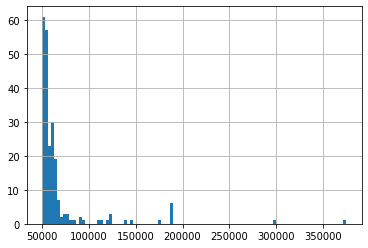

In [ ]:
expensive = df.query('price > 50000')
expensive['price'].hist(bins=100)

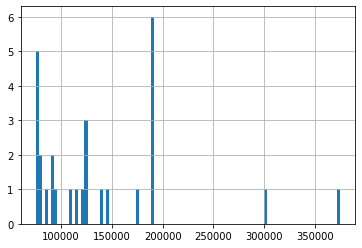

In [ ]:
mega_expensive = df.query('price > 70000')
mega_expensive['price'].hist(bins=100)

In [ ]:
mega_expensive

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
1309,189000,2014,ford f-150,good,6,gas,151248.000000,automatic,truck,black,False,2019-03-02,56,5,30249.6,2
1326,79900,2005,ford f350,like new,8,diesel,10060.000000,automatic,pickup,white,True,2018-07-16,22,13,773.8,4
1668,189000,2014,ford f-150,good,6,gas,151248.000000,automatic,truck,white,False,2019-03-20,21,5,30249.6,2
2790,76000,2016,chevrolet corvette,new,8,gas,1700.000000,automatic,convertible,white,False,2018-07-15,79,2,850.0,5
3919,75000,2016,ford f-150,like new,6,gas,19500.000000,automatic,pickup,red,True,2018-05-16,35,2,9750.0,4
4113,90577,2018,ford f-150,excellent,6,gas,6448.000000,automatic,truck,black,True,2018-07-29,19,0,6448.0,3
7113,84900,2019,ford f350,new,8,diesel,9000.000000,automatic,pickup,white,True,2019-03-26,7,0,9000.0,5
11359,300000,2015,ram 2500,excellent,6,diesel,77677.555556,automatic,truck,grey,True,2018-10-15,39,3,25892.5,3
12485,78000,2009,honda odyssey,good,6,gas,126567.000000,automatic,van,blue,False,2018-11-14,28,9,14063.0,2
12504,375000,1999,nissan frontier,good,6,gas,115000.000000,automatic,pickup,blue,True,2018-05-19,21,19,6052.6,2


In [ ]:
listing_group(['model_year', 'model', 'condition'], mega_expensive.iloc[0], mega_expensive)
#these are all suspiciously similar, looks like their odometer was estimated previously, and since their price is an outlier, I estimated it based on similar vehicles regardless of price

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
1309,189000,2014,ford f-150,good,6,gas,151248.0,automatic,truck,black,False,2019-03-02,56,5,30249.6,2
1668,189000,2014,ford f-150,good,6,gas,151248.0,automatic,truck,white,False,2019-03-20,21,5,30249.6,2
27375,189000,2014,ford f-150,good,6,gas,151248.0,automatic,truck,black,False,2018-09-25,72,4,37812.0,2
30634,189000,2014,ford f-150,good,6,gas,151248.0,automatic,truck,black,False,2018-07-21,42,4,37812.0,2
33434,189000,2014,ford f-150,good,6,gas,151248.0,automatic,truck,black,False,2019-02-05,102,5,30249.6,2
34389,189000,2014,ford f-150,good,6,gas,151248.0,automatic,truck,black,False,2019-02-02,28,5,30249.6,2


In [ ]:
mega_expensive.query('condition_id >= 4 and odometer < 15000')
#these are the only conceivable correct pricings of vehicles more expensive than 70k

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
1326,79900,2005,ford f350,like new,8,diesel,10060.0,automatic,pickup,white,True,2018-07-16,22,13,773.8,4
2790,76000,2016,chevrolet corvette,new,8,gas,1700.0,automatic,convertible,white,False,2018-07-15,79,2,850.0,5
7113,84900,2019,ford f350,new,8,diesel,9000.0,automatic,pickup,white,True,2019-03-26,7,0,9000.0,5
20700,109999,2016,chevrolet corvette,new,8,gas,35.0,automatic,coupe,white,False,2018-09-07,74,2,17.5,5
23774,76500,2015,chevrolet silverado 2500hd,like new,8,diesel,8989.0,automatic,pickup,white,True,2019-02-23,31,4,2247.2,4
28007,75000,2019,cadillac escalade,like new,8,gas,9000.0,automatic,SUV,red,True,2019-03-28,40,0,9000.0,4


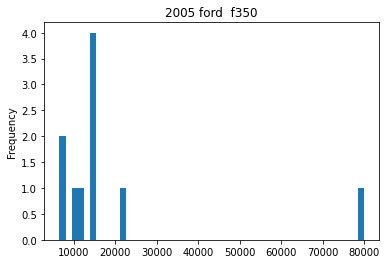

In [ ]:
listing_group(['model_year', 'model'], df.iloc[1326], df)['price'].plot(kind='hist', bins=50, title='2005 ford  f350') #even then

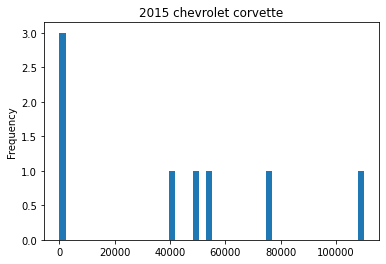

In [ ]:
listing_group(['model_year', 'model'], df.iloc[20700], df)['price'].plot(kind='hist', bins=50, title='2015 chevrolet corvette')

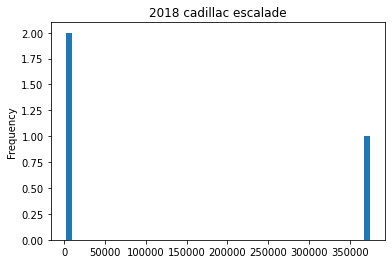

In [ ]:
listing_group(['model_year', 'model'], df.iloc[12504], df)['price'].plot(kind='hist', bins=50, title='2018 cadillac escalade')

###vehicle age

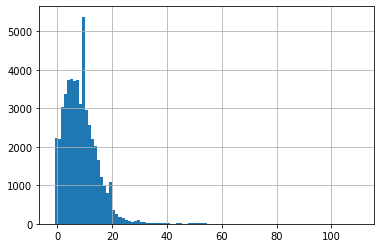

In [ ]:

df['vehicle_age'].hist(bins=100)

#some vehicles are older than 40 years?

In [ ]:
old = df.query('vehicle_age > 40')
old

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
63,30000,1966,ford mustang,excellent,8,gas,51000.0,manual,convertible,red,False,2019-01-23,17,53,962.3,3
357,16600,1975,chevrolet corvette,excellent,8,gas,75000.0,manual,coupe,white,False,2019-03-09,69,44,1704.5,3
358,18400,1975,chevrolet corvette,excellent,8,gas,18000.0,automatic,coupe,orange,False,2019-01-06,41,44,409.1,3
899,10500,1977,chevrolet corvette,excellent,8,gas,54000.0,automatic,coupe,yellow,False,2019-02-24,54,42,1285.7,3
1045,3500,1974,ford f-250,excellent,8,gas,139000.0,automatic,pickup,orange,False,2018-10-28,5,44,3159.1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49783,7000,1977,chevrolet corvette,good,8,gas,110000.0,automatic,coupe,blue,False,2018-08-14,138,41,2682.9,2
50169,7500,1977,ford f-250,good,8,gas,112000.0,automatic,truck,yellow,True,2018-07-03,99,41,2731.7,2
50254,12000,1973,chevrolet corvette,good,8,gas,42820.0,manual,coupe,blue,False,2018-07-07,9,45,951.6,2
50451,49900,1973,chevrolet corvette,excellent,8,gas,19500.0,manual,convertible,red,False,2018-06-09,41,45,433.3,3


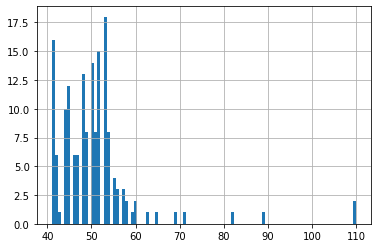

In [ ]:
old['vehicle_age'].hist(bins=100)

In [ ]:
df[df['vehicle_age'] > 55] #the 1908 cadillac escalade and gmc yukon seem wrong

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
4379,25000,1963,chevrolet impala,excellent,8,gas,32974.000000,automatic,sedan,white,False,2019-01-03,65,56,588.8,3
10018,23900,1955,ford f250,excellent,6,gas,47180.000000,manual,truck,blue,False,2018-12-22,61,63,748.9,3
14752,15000,1954,ford f-150,excellent,8,gas,3565.000000,manual,pickup,black,False,2019-02-16,13,65,54.8,3
21083,20000,1962,chevrolet impala,good,6,gas,0.000000,automatic,sedan,blue,False,2019-02-14,57,57,0.0,2
22595,21000,1948,chevrolet impala,like new,8,gas,4000.000000,automatic,sedan,red,False,2019-01-18,24,71,56.3,4
28009,65000,1960,chevrolet corvette,like new,8,gas,201000.000000,manual,coupe,silver,False,2018-11-03,41,58,3465.5,4
29769,49750,1962,chevrolet corvette,excellent,8,gas,72000.000000,manual,sedan,white,False,2018-08-26,18,56,1285.7,3
33007,17500,1960,chevrolet impala,excellent,8,gas,31000.000000,automatic,sedan,white,False,2019-02-01,11,59,525.4,3
33257,4500,1963,chevrolet impala,fair,8,gas,133883.450000,automatic,sedan,silver,False,2019-03-17,38,56,2390.8,1
33906,12995,1908,gmc yukon,good,8,gas,169328.000000,automatic,SUV,black,False,2018-07-06,34,110,1539.3,2


In [ ]:
listing_group(['model', 'price', 'condition', 'odometer'], df.iloc[33906], df)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
7885,15000,2011,gmc yukon,good,8,gas,165000.0,automatic,SUV,black,True,2018-05-23,55,7,23571.4,2
14518,11550,2011,gmc yukon,good,8,gas,176962.0,automatic,SUV,black,True,2019-03-14,14,8,22120.2,2
33906,12995,1908,gmc yukon,good,8,gas,169328.0,automatic,SUV,black,False,2018-07-06,34,110,1539.3,2
34882,12977,2011,gmc yukon,good,8,gas,164448.0,automatic,SUV,grey,True,2018-07-13,24,7,23492.6,2
41654,13995,2011,gmc yukon,good,8,gas,157475.0,automatic,SUV,white,True,2018-11-05,108,7,22496.4,2
50826,11995,2011,gmc yukon,good,8,gas,176962.0,automatic,SUV,black,True,2018-05-01,8,7,25280.3,2


In [ ]:
listing_group(['model', 'price', 'condition', 'odometer'], df.iloc[33907], df)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
11477,13995,2009,cadillac escalade,excellent,8,gas,131539.333333,automatic,SUV,silver,True,2018-07-20,92,9,14615.5,3
15072,13990,2008,cadillac escalade,excellent,8,gas,132388.000000,automatic,SUV,black,False,2018-11-06,35,10,13238.8,3
17591,10950,2010,cadillac escalade,excellent,8,gas,129176.000000,automatic,SUV,black,True,2018-05-28,48,8,16147.0,3
19890,11900,2007,cadillac escalade,excellent,8,gas,126527.400000,automatic,SUV,brown,True,2019-04-18,12,12,10543.9,3
22029,11500,2008,cadillac escalade,excellent,8,gas,131000.000000,automatic,SUV,black,False,2018-08-11,8,10,13100.0,3
23464,14995,2008,cadillac escalade,excellent,8,gas,123000.000000,automatic,SUV,white,True,2019-02-16,31,11,11181.8,3
24742,14995,2010,cadillac escalade,excellent,8,gas,121503.000000,automatic,SUV,black,True,2018-05-23,53,8,15187.9,3
26148,12995,2006,cadillac escalade,excellent,8,gas,124321.000000,automatic,SUV,white,True,2018-09-27,22,12,10360.1,3
27266,14995,2009,cadillac escalade,excellent,8,gas,130014.000000,automatic,SUV,black,True,2018-12-06,48,9,14446.0,3
33907,12995,1908,cadillac escalade,excellent,8,gas,130479.075000,automatic,SUV,white,False,2018-06-24,25,110,1186.2,3


<div class='alert alert-info'> both the 1908 vehicles seems to be from the late 2000s based on similar factors, but the error is somewhat unexplainable in terms of how the heck did someone put 1908, probably best to discard these rows

In [ ]:
df['vehicle_age'].value_counts() #-1 hmm

 5     3752
 7     3739
 4     3736
 6     3723
 3     3374
       ... 
-1        1
 71       1
 65       1
 63       1
 89       1
Name: vehicle_age, Length: 69, dtype: int64

In [ ]:
df.query('vehicle_age < 0') #doesn't seem correct

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
30786,1,2019,dodge charger,excellent,10,gas,18485.0,automatic,sedan,white,True,2018-07-07,44,-1,-18485.0,3


###mileage

In [ ]:
df['mileage_per_year'].describe()

#negative numbers don't make sense

count     51525.000000
mean      17978.964885
std       13165.031490
min      -18485.000000
25%       10762.300000
50%       15112.100000
75%       21469.000000
max      373200.000000
Name: mileage_per_year, dtype: float64

In [ ]:
df.query('mileage_per_year < 0') #that same listing that is impossible

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
30786,1,2019,dodge charger,excellent,10,gas,18485.0,automatic,sedan,white,True,2018-07-07,44,-1,-18485.0,3


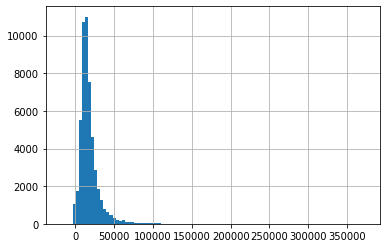

In [ ]:
df['mileage_per_year'].hist(bins=100)

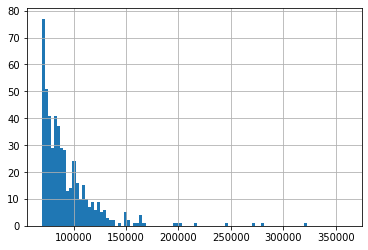

In [ ]:
df['mileage_per_year'].hist(bins=100, range=(70000, 360000)) #seems to trail off around 140000

In [ ]:
100000/365 #I guess that's possible

273.972602739726

In [ ]:
df.query('mileage_per_year > 140000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
220,41800,2018,chevrolet silverado 3500hd,good,8,gas,148459.000000,automatic,truck,black,True,2019-03-19,11,1,148459.000000,2
2840,18500,2014,ford explorer,excellent,6,gas,866000.000000,automatic,SUV,black,True,2018-07-20,14,4,216500.000000,3
3754,29995,2017,gmc sierra 2500hd,excellent,8,gas,164409.000000,automatic,pickup,red,True,2018-11-04,37,1,164409.000000,3
4049,34995,2017,gmc sierra 2500hd,excellent,8,gas,164409.000000,automatic,pickup,red,True,2018-10-05,68,1,164409.000000,3
4970,29000,2018,chevrolet silverado 1500,excellent,8,gas,373200.000000,automatic,truck,green,True,2018-09-14,40,0,373200.000000,3
5459,29995,2017,gmc sierra 2500hd,excellent,8,gas,164409.000000,automatic,pickup,red,True,2018-11-25,24,1,164409.000000,3
5735,7500,2015,hyundai elantra,excellent,4,gas,813542.000000,other,coupe,brown,False,2018-11-21,5,3,271180.700000,3
9224,1500,2018,ford f-150,excellent,6,gas,150000.000000,automatic,truck,white,False,2019-02-05,32,1,150000.000000,3
9742,12500,2018,nissan altima,like new,4,gas,320000.000000,automatic,sedan,silver,False,2018-08-14,75,0,320000.000000,4
13027,8500,2015,chevrolet malibu,excellent,4,gas,838095.000000,automatic,sedan,silver,False,2018-05-30,10,3,279365.000000,3


In [ ]:
listing_group(['model_year', 'model'], df.iloc[9742], df) #'like new', 320,000 miles in one year, hmmm

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
406,288,2018,nissan altima,excellent,4,gas,40277.000000,automatic,sedan,silver,False,2018-10-19,37,0,40277.000000,3
1278,17998,2018,nissan altima,excellent,4,gas,35745.000000,automatic,sedan,silver,False,2018-12-04,32,0,35745.000000,3
5095,17966,2018,nissan altima,excellent,4,gas,35707.666667,automatic,sedan,silver,False,2018-11-30,23,0,35707.666667,3
5305,206,2018,nissan altima,like new,4,gas,47084.000000,automatic,sedan,black,False,2018-11-25,36,0,47084.000000,4
7842,18999,2018,nissan altima,like new,4,gas,8638.000000,automatic,sedan,grey,False,2018-08-25,33,0,8638.000000,4
9181,1,2018,nissan altima,excellent,10,gas,42007.000000,other,sedan,custom,True,2018-10-26,32,0,42007.000000,3
9534,1,2018,nissan altima,excellent,10,gas,42007.000000,other,sedan,custom,True,2019-03-14,45,1,42007.000000,3
9742,12500,2018,nissan altima,like new,4,gas,320000.000000,automatic,sedan,silver,False,2018-08-14,75,0,320000.000000,4
10970,13800,2018,nissan altima,like new,4,gas,122766.666667,automatic,sedan,silver,False,2018-08-28,23,0,122766.666667,4
11393,1,2018,nissan altima,excellent,4,gas,31142.000000,automatic,sedan,white,False,2018-05-13,87,0,31142.000000,3


###cylinders

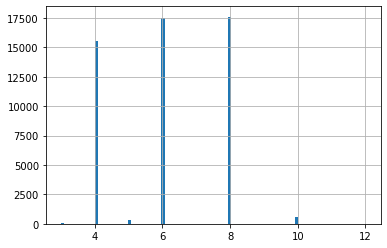

In [ ]:
df['cylinders'].hist(bins=100)

In [ ]:
df.query('cylinders < 4') #googled it, 3 cylinder cars are a thing, no error

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
1527,6000,2011,toyota prius,excellent,3,gas,143000.00,automatic,hatchback,black,False,2018-12-30,37,7,20428.6,3
3882,6200,2008,ford f-150,excellent,3,gas,166000.00,automatic,truck,white,False,2018-06-30,67,10,16600.0,3
9244,800,1999,ford ranger,good,3,gas,192000.00,automatic,pickup,white,False,2018-05-29,33,19,10105.3,2
12596,20500,2010,jeep wrangler,excellent,3,gas,79300.00,automatic,SUV,blue,True,2019-02-08,8,9,8811.1,3
14483,3900,2000,ford ranger,good,3,gas,137780.00,automatic,pickup,blue,True,2018-09-24,16,18,7654.4,2
14932,1150,2004,honda civic,fair,3,diesel,210000.00,automatic,sedan,blue,False,2019-02-09,25,15,14000.0,1
16672,2500,2009,honda civic lx,excellent,3,hybrid,250000.00,automatic,sedan,grey,False,2019-02-06,29,10,25000.0,3
17239,6000,2009,chevrolet traverse,good,3,gas,63000.00,automatic,SUV,green,False,2018-11-02,48,9,7000.0,2
21102,26124,2018,ford escape,excellent,3,gas,2050.00,automatic,SUV,black,True,2018-10-25,29,0,2050.0,3
22183,1,2015,ford focus se,like new,3,gas,104943.50,manual,sedan,grey,False,2018-10-17,78,3,34981.2,4


In [ ]:
df.query('cylinders > 10') #massive diesel trucks

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
12615,18000,2001,ram 2500,excellent,12,diesel,167500.0,manual,truck,silver,True,2018-08-05,22,17,9852.9,3
44117,20000,2004,ford f350 super duty,excellent,12,diesel,41640.0,automatic,truck,grey,True,2019-03-29,24,15,2776.0,3


###condition

{'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}


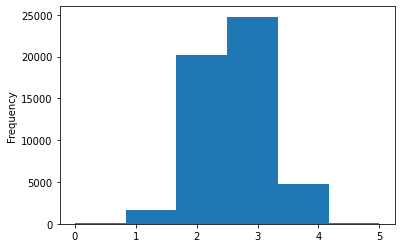

In [ ]:
df['condition_id'].plot(kind='hist', bins=6)
print(condition_dict)

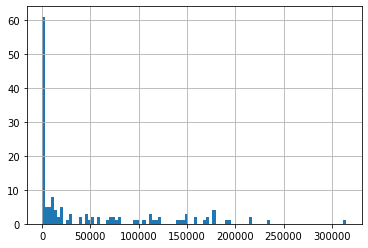

In [ ]:
df.query('condition_id == 5')['odometer'].hist(bins=100) #must have had some work done

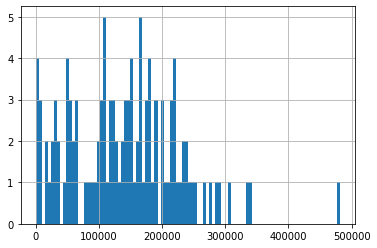

In [ ]:
df.query('condition_id == 0')['odometer'].hist(bins=100)

## Study and treat outliers

price, vehicle_age, and mileage_per_year all have gross outliers

###price

In [ ]:
price_IQR = df['price'].quantile(.75) - df['price'].quantile(.25)
lower_outlier = df['price'].quantile(.25) - (1.5 * price_IQR)

lower_outlier

-12758.5

<div class='alert alert-info'> seems like the IQR*1.5 method determines that there is no price too low to be an outlier, however in this dataset I do not believe that to be the case

In [ ]:
df.query('price < 1000 and condition_id > 1')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
218,500,2004,toyota corolla,like new,4,gas,191210.6,automatic,sedan,blue,False,2018-09-17,24,14,13657.9,4
332,500,2004,toyota corolla,like new,4,gas,226980.0,automatic,sedan,silver,False,2018-09-19,19,14,16212.9,4
405,1,2014,chevrolet camaro,excellent,6,gas,71310.0,automatic,coupe,black,False,2018-07-14,29,4,17827.5,3
406,288,2018,nissan altima,excellent,4,gas,40277.0,automatic,sedan,silver,False,2018-10-19,37,0,40277.0,3
632,299,2004,toyota camry,excellent,4,gas,185234.0,automatic,sedan,silver,False,2018-08-12,42,14,13231.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50819,299,2004,toyota camry,excellent,4,gas,185634.0,automatic,sedan,silver,False,2019-01-31,39,15,12375.6,3
50839,475,2018,gmc sierra 1500,like new,8,gas,6500.0,automatic,truck,black,True,2018-07-10,18,0,6500.0,4
50971,10,2012,toyota prius,excellent,4,hybrid,101000.0,automatic,hatchback,green,False,2019-03-16,29,7,14428.6,3
51256,1,2012,honda civic lx,excellent,4,gas,71262.0,automatic,sedan,blue,False,2018-05-06,53,6,11877.0,3


<div class='alert alert-info'> everything worth 1 dollar needs to go

In [ ]:
df = df.query('price > 1') #can't use iloc anymore

In [ ]:
df.info()
#cut about 800 listings

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50727 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             50727 non-null  int64         
 1   model_year        50727 non-null  int64         
 2   model             50727 non-null  object        
 3   condition         50727 non-null  object        
 4   cylinders         50727 non-null  int64         
 5   fuel              50727 non-null  object        
 6   odometer          50727 non-null  float64       
 7   transmission      50727 non-null  object        
 8   type              50727 non-null  object        
 9   paint_color       50727 non-null  object        
 10  is_4wd            50727 non-null  bool          
 11  date_posted       50727 non-null  datetime64[ns]
 12  days_listed       50727 non-null  int64         
 13  vehicle_age       50727 non-null  int64         
 14  mileage_per_year  5072

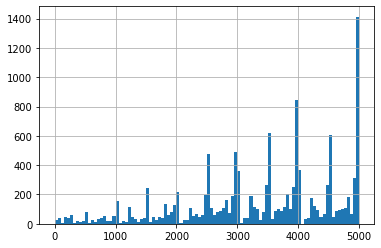

In [ ]:
df['price'].hist(bins=100, range=(0, 5000))

<div class='alert alert-info'> lets look at every car priced under 5000, and determine if thats an outlier amongst similar cars

In [ ]:
df.query('price < 1000').sort_values(by='price', ascending=False).head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
5266,999,1998,toyota corolla,good,4,gas,201000.000000,automatic,sedan,blue,False,2018-07-14,51,20,10050.0,2
13934,999,2017,ram 1500,excellent,8,gas,35625.933333,automatic,truck,blue,True,2018-05-03,40,1,35625.9,3
45748,999,2003,honda civic,fair,4,gas,199912.000000,automatic,sedan,black,False,2019-03-23,18,16,12494.5,1
17430,999,2002,toyota sienna,fair,6,gas,259000.000000,automatic,van,white,False,2018-10-26,25,16,16187.5,1
15031,999,2013,ford explorer,like new,6,gas,139000.000000,automatic,SUV,black,True,2019-01-14,7,6,23166.7,4
33546,999,2002,ford escape,fair,6,gas,142000.000000,automatic,SUV,blue,True,2018-09-20,13,16,8875.0,1
34715,999,1996,ford explorer,good,6,gas,221074.000000,automatic,SUV,red,True,2019-04-06,16,23,9611.9,2
10312,999,2016,jeep cherokee,excellent,6,gas,42000.000000,automatic,sedan,black,False,2018-11-12,37,2,21000.0,3
13991,999,2012,jeep wrangler unlimited,excellent,6,gas,121000.000000,automatic,SUV,red,True,2018-08-20,6,6,20166.7,3
45920,999,1998,ford expedition,fair,8,gas,172000.000000,automatic,SUV,white,True,2018-07-09,34,20,8600.0,1


count       11.000000
mean     24578.181818
std       9029.399424
min        999.000000
25%      21247.500000
50%      27685.000000
75%      29605.000000
max      33858.000000
Name: price, dtype: float64

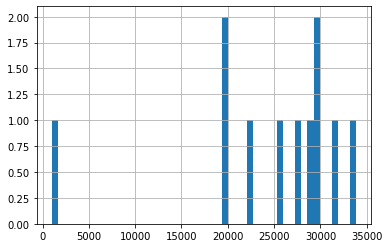

In [ ]:
group = listing_group(['model_year', 'model', 'odometer', 'condition'], df.loc[13934], df)
group['price'].hist(bins=50) #not normal enough to use IQR but maybe Z score will work to spot the outlier
group['price'].describe()

<div class='alert alert-info'> lets look at what happens if I remove listings that are cheaper than 10% of the mean price of very similar listings

In [ ]:
cheap = df.query('price < 1000')
too_cheap_listings = []
failed = []
for i in range(len(cheap)):
  group = listing_group(['model_year', 'model', 'odometer', 'condition'], cheap.iloc[i], df)
  if len(group) >= 10:
    if cheap.iloc[i]['price'] < group['price'].mean()*.1:
      too_cheap_listings.append(cheap.index[i])
  else: #too few similar listings, expand search
    group = listing_group(['model_year', 'model', 'odometer'], cheap.iloc[i], df)
    if len(group) >= 10:
      if cheap.iloc[i]['price'] < group['price'].mean()*.1:
        too_cheap_listings.append(cheap.index[i])
    else: #expand search again
      group = listing_group(['model_year', 'model'], cheap.iloc[i], df)
      if len(group) >= 10:
        if cheap.iloc[i]['price'] < group['price'].mean()*.1:
          too_cheap_listings.append(cheap.index[i])
      else: #not at least 5 models of same year, look at just model
        group = listing_group(['model'], cheap.iloc[i], df)
        if len(group) >= 5:
          if cheap.iloc[i]['price'] < group['price'].mean()*.1:
            too_cheap_listings.append(cheap.index[i])
        else: #just look at cars that old in that condition
          group = listing_group(['model_year', 'condition'], cheap.iloc[i], df)
          if len(group) >= 5:
            if cheap.iloc[i]['price'] < group['price'].mean()*.1:
              too_cheap_listings.append(cheap.index[i])

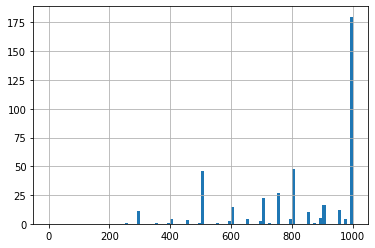

In [ ]:
df.drop(index=too_cheap_listings)['price'].hist(bins=100, range=(0, 1000))

In [ ]:
df.drop(index=too_cheap_listings).query('price < 500') #still some potentially iffy prices, but looks a lot better than before

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
632,299,2004,toyota camry,excellent,4,gas,185234.000000,automatic,sedan,silver,False,2018-08-12,42,14,13231.0,3
1882,400,1993,ford ranger,fair,6,gas,108985.666667,automatic,truck,white,False,2018-11-07,16,25,4359.4,1
8411,400,2006,ford taurus,good,6,gas,103.000000,automatic,sedan,silver,False,2018-10-11,49,12,8.6,2
10010,400,2006,ford focus,salvage,4,gas,0.000000,manual,sedan,black,False,2018-12-29,59,12,0.0,0
13833,299,2004,toyota camry,excellent,4,gas,185234.000000,automatic,sedan,black,False,2018-06-16,71,14,13231.0,3
16276,299,2004,toyota camry,excellent,4,gas,185234.000000,automatic,sedan,silver,False,2019-02-23,54,15,12348.9,3
16431,400,1999,ford f-150,fair,8,gas,227482.000000,automatic,truck,green,False,2018-09-28,26,19,11972.7,1
17219,299,2004,toyota camry,excellent,4,gas,185234.000000,automatic,sedan,silver,False,2018-07-21,77,14,13231.0,3
22471,450,2003,ford escape,fair,6,gas,150871.470588,automatic,SUV,silver,False,2018-12-02,25,15,10058.1,1
24564,350,1998,ford explorer,fair,6,gas,180000.000000,automatic,SUV,red,True,2018-12-06,23,20,9000.0,1


In [ ]:
df.loc[too_cheap_listings].sort_values(by='price', ascending=False)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
10312,999,2016,jeep cherokee,excellent,6,gas,42000.000000,automatic,sedan,black,False,2018-11-12,37,2,21000.0,3
13934,999,2017,ram 1500,excellent,8,gas,35625.933333,automatic,truck,blue,True,2018-05-03,40,1,35625.9,3
13991,999,2012,jeep wrangler unlimited,excellent,6,gas,121000.000000,automatic,SUV,red,True,2018-08-20,6,6,20166.7,3
15031,999,2013,ford explorer,like new,6,gas,139000.000000,automatic,SUV,black,True,2019-01-14,7,6,23166.7,4
686,999,1995,toyota 4runner,salvage,6,gas,164221.000000,automatic,SUV,red,False,2018-05-03,33,23,7140.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50971,10,2012,toyota prius,excellent,4,hybrid,101000.000000,automatic,hatchback,green,False,2019-03-16,29,7,14428.6,3
39379,9,2010,subaru forester,good,4,gas,119.000000,automatic,SUV,grey,True,2019-03-02,12,9,13.2,2
31263,6,1999,ford f250,good,8,gas,173500.000000,automatic,pickup,white,True,2019-02-07,53,20,8675.0,2
50430,5,2011,toyota sienna,good,6,gas,198310.918367,automatic,SUV,green,False,2018-12-03,5,7,28330.1,2


In [ ]:
df = df.drop(index=too_cheap_listings)
df['price'].describe()

count     50387.000000
mean      12404.207613
std        9987.509724
min         250.000000
25%        5450.000000
50%        9500.000000
75%       16990.000000
max      375000.000000
Name: price, dtype: float64

<div class='alert alert-info'> now that the obvious ones (so obvious IQR method wouldn't have worked) are out of the way, lets use IQR on rest of the data

In [ ]:
#make list of groups of at least 6 (average is 5.6 listings) similar listings that can be used to search for price outliers

similar = df.drop(columns=['price', 'odometer', 'date_posted', 'days_listed', 'paint_color', 'fuel', 'transmission', 'type', 'cylinders', 'is_4wd', 'vehicle_age', 'mileage_per_year', 'condition_id']) #create a dataframe without entirely specific values
x = similar.value_counts() >= 6
#create a list of any rows with similar listings 
groups = [list(x.index[i]) for i in range(len(x)) if x[x.index[i]] == True]

groups = pd.DataFrame(data=groups, columns=['model_year', 'model', 'condition'])
print(len(groups))
#can now be iterated through to check all similar listing groups of significant size

too_cheap = []

for i in range(len(groups)):
  group = listing_group(['model_year', 'model', 'condition'], groups.loc[i], df)
  IQR_odometer = group['odometer'].quantile(.75) - group['odometer'].quantile(.25)
  IQR_price = group['price'].quantile(.75) - group['price'].quantile(.25)
  floor_price = group['price'].quantile(.25) - 1.5*IQR_price
  ceil_odometer = group['odometer'].quantile(.75) + 1.5*IQR_odometer
  #for extremely high odometer values, an outlier price is normal, so ignore those
  group = group.query('odometer < @ceil_odometer')
  for j in range(len(group)):
    if group.iloc[j]['price'] < floor_price:
      too_cheap.append(group.index[j])

df.loc[too_cheap]


2490


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
10333,4500,2014,ford f-150,excellent,8,gas,72000.000000,automatic,truck,custom,True,2019-02-26,24,5,14400.0,3
50184,4500,2014,ford f-150,excellent,8,gas,72000.000000,automatic,truck,custom,True,2018-11-26,40,4,18000.0,3
50185,2500,2014,ford f-150,excellent,8,gas,115000.000000,automatic,truck,white,True,2018-09-28,28,4,28750.0,3
50221,4500,2014,ford f-150,excellent,8,gas,72000.000000,automatic,truck,custom,True,2018-10-16,29,4,18000.0,3
50222,2500,2014,ford f-150,excellent,6,gas,115000.000000,automatic,truck,white,True,2019-03-03,13,5,23000.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22689,10800,2018,kia soul,excellent,4,gas,8900.000000,automatic,hatchback,black,False,2018-07-23,58,0,8900.0,3
12119,3000,2015,ford focus se,good,4,gas,114759.000000,automatic,sedan,silver,False,2019-01-05,3,4,28689.8,2
21032,3200,2007,nissan versa,excellent,4,gas,118126.666667,automatic,hatchback,grey,False,2018-11-03,98,11,10738.8,3
19958,6000,2016,hyundai sonata,good,6,gas,107711.000000,automatic,sedan,silver,False,2018-11-12,72,2,53855.5,2


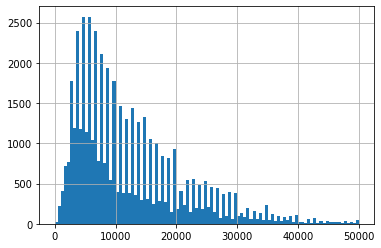

In [ ]:
df.drop(index=too_cheap)['price'].hist(bins=100, range=(0, 50000))

In [ ]:
df = df.drop(index=too_cheap)

<div class='alert alert-info'> now lets look at too expensive of cars

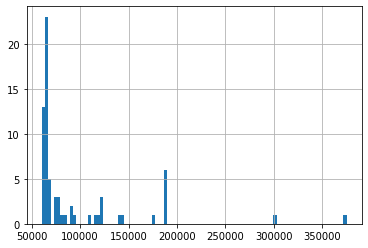

In [ ]:
df.query('price > 60000')['price'].hist(bins=100)

<div class='alert alert-info'> first off lets get rid of the OBVIOUS outliers

In [ ]:
nice_cars = df.query('model_year > 2016 and odometer < 10000 and condition_id >= 4') #the cream of the crop
IQR = nice_cars['price'].quantile(.75) - nice_cars['price'].quantile(.25)
nice_cars['price'].quantile(.75) + 1.5*IQR

67830.5

In [ ]:
nice_cars['price'].quantile(.75) + 3*nice_cars['price'].std() #Z value outlier

81228.86007098605

In [ ]:
df.query('price > 81228')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
1309,189000,2014,ford f-150,good,6,gas,151248.000000,automatic,truck,black,False,2019-03-02,56,5,30249.6,2
1668,189000,2014,ford f-150,good,6,gas,151248.000000,automatic,truck,white,False,2019-03-20,21,5,30249.6,2
4113,90577,2018,ford f-150,excellent,6,gas,6448.000000,automatic,truck,black,True,2018-07-29,19,0,6448.0,3
7113,84900,2019,ford f350,new,8,diesel,9000.000000,automatic,pickup,white,True,2019-03-26,7,0,9000.0,5
11359,300000,2015,ram 2500,excellent,6,diesel,77677.555556,automatic,truck,grey,True,2018-10-15,39,3,25892.5,3
12504,375000,1999,nissan frontier,good,6,gas,115000.000000,automatic,pickup,blue,True,2018-05-19,21,19,6052.6,2
20700,109999,2016,chevrolet corvette,new,8,gas,35.000000,automatic,coupe,white,False,2018-09-07,74,2,17.5,5
22833,115000,2012,ford f-250 super duty,good,8,diesel,225000.000000,automatic,truck,white,False,2018-12-08,53,6,37500.0,2
24999,140000,2004,ram 2500,good,6,diesel,249000.000000,automatic,truck,red,True,2019-01-22,8,15,16600.0,2
27375,189000,2014,ford f-150,good,6,gas,151248.000000,automatic,truck,black,False,2018-09-25,72,4,37812.0,2


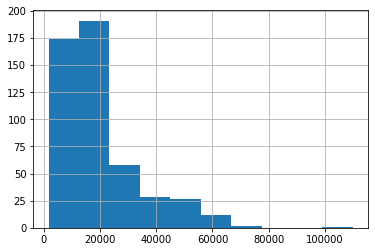

In [ ]:
listing_group(['model'], df.loc[20700], df)['price'].hist() # 2016	chevrolet corvette

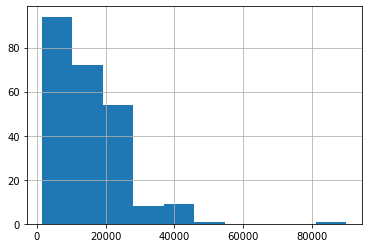

In [ ]:
listing_group(['model'], df.loc[37904], df)['price'].hist() #2018	ford f350 super duty

In [ ]:
#just cut those clear outliers
df = df.query('price < 81228')

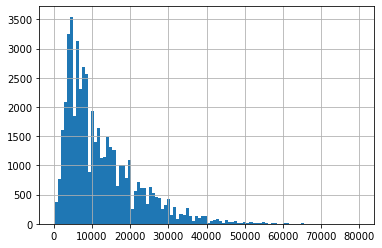

In [ ]:
df['price'].hist(bins=100)

In [ ]:
#make list of groups of at least 6 (average is 5.6 listings) similar listings that can be used to search for price outliers

similar = df.drop(columns=['price', 'odometer', 'date_posted', 'days_listed', 'paint_color', 'fuel', 'transmission', 'type', 'cylinders', 'is_4wd', 'vehicle_age', 'mileage_per_year', 'condition', 'condition_id']) #create a dataframe without entirely specific values
x = similar.value_counts() >= 6
#create a list of any rows with similar listings 
groups = [list(x.index[i]) for i in range(len(x)) if x[x.index[i]] == True]

groups = pd.DataFrame(data=groups, columns=['model_year', 'model'])
print(len(groups))
#can now be iterated through to check all similar listing groups of significant size

too_expensive = []

for i in range(len(groups)):
  group = listing_group(['model_year', 'model'], groups.loc[i], df)
  IQR_price = group['price'].quantile(.75) - group['price'].quantile(.25)
  large_ceil = group['price'].quantile(.75) + 1.5*IQR_price
  small_ceil = group['price'].quantile(.75)+(3*group['price'].std())
  
  #if z is larger than IQR*1.5
  if group['price'].quantile(.75)+(3*group['price'].std()) > large_ceil:
    small_ceil = large_ceil
    large_ceil = group['price'].quantile(.75) + (3*group['price'].std())
  
  for j in range(len(group)):

    #if the price isn't very low use the large ceiling
    if group.iloc[j]['price'] >= 6000: 
      if group.iloc[j]['price'] > small_ceil:
        too_expensive.append(group.index[j])
    else:
      if group.iloc[j]['price'] > large_ceil:
        too_expensive.append(group.index[j])
df.loc[too_expensive]

1621


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
468,29667,2013,ford f-150,excellent,8,gas,41350.0,automatic,pickup,black,True,2019-03-04,15,6,6891.7,3
2375,34500,2013,ford f-150,excellent,8,gas,48000.0,automatic,pickup,yellow,True,2019-01-14,69,6,8000.0,3
35139,29000,2013,ford f-150,like new,6,gas,86500.0,automatic,truck,black,True,2018-08-23,5,5,17300.0,4
43197,30995,2013,ford f-150,excellent,8,gas,100130.0,automatic,pickup,silver,True,2019-02-16,12,6,16688.3,3
14993,46500,2011,ford f-150,excellent,8,gas,79800.0,automatic,offroad,black,True,2018-10-30,58,7,11400.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10221,26000,2002,ford f350,like new,8,diesel,96000.0,automatic,truck,black,False,2019-02-27,19,17,5647.1,4
31110,16900,2007,subaru impreza,good,4,gas,246207.5,manual,sedan,grey,True,2018-08-21,27,11,22382.5,2
6685,24000,2017,honda odyssey,good,6,gas,53432.0,automatic,mini-van,white,False,2018-05-08,52,1,53432.0,2
29393,6500,1997,jeep cherokee,good,6,gas,185000.0,automatic,SUV,red,True,2018-11-22,15,21,8809.5,2


In [ ]:
df.drop(index=too_expensive).sort_values(by='price', ascending=False)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
50664,76995,2018,cadillac escalade,excellent,8,gas,4500.0,other,SUV,white,True,2018-10-25,21,0,4500.0,3
2790,76000,2016,chevrolet corvette,new,8,gas,1700.0,automatic,convertible,white,False,2018-07-15,79,2,850.0,5
28007,75000,2019,cadillac escalade,like new,8,gas,9000.0,automatic,SUV,red,True,2019-03-28,40,0,9000.0,4
11656,70000,2018,ram 3500,like new,6,diesel,44000.0,automatic,pickup,grey,True,2018-08-06,31,0,44000.0,4
42749,69900,1969,chevrolet camaro,new,8,gas,1000.0,automatic,convertible,silver,False,2019-04-10,60,50,20.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17219,299,2004,toyota camry,excellent,4,gas,185234.0,automatic,sedan,silver,False,2018-07-21,77,14,13231.0,3
16276,299,2004,toyota camry,excellent,4,gas,185234.0,automatic,sedan,silver,False,2019-02-23,54,15,12348.9,3
50050,299,2004,toyota camry,excellent,4,gas,185698.0,automatic,sedan,silver,False,2019-02-16,103,15,12379.9,3
45265,299,2004,toyota camry,excellent,4,gas,185324.0,automatic,sedan,silver,False,2019-03-28,15,15,12354.9,3


In [ ]:
df = df.drop(index=too_expensive)

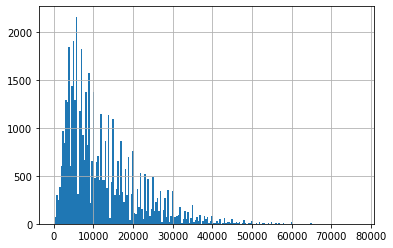

In [ ]:
df['price'].hist(bins=200)

###vehicle_age

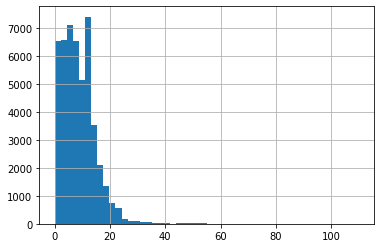

In [ ]:
df['vehicle_age'].hist(bins=50)

In [ ]:
df.query('vehicle_age > 55').sort_values('model_year')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
33906,12995,1908,gmc yukon,good,8,gas,169328.000000,automatic,SUV,black,False,2018-07-06,34,110,1539.3,2
33907,12995,1908,cadillac escalade,excellent,8,gas,130479.075000,automatic,SUV,white,False,2018-06-24,25,110,1186.2,3
45694,18000,1929,ford f-150,good,8,gas,111009.238994,manual,other,silver,False,2018-11-18,59,89,1247.3,2
34713,5000,1936,ford f-150,excellent,6,gas,30000.000000,manual,pickup,purple,False,2018-11-22,10,82,365.9,3
22595,21000,1948,chevrolet impala,like new,8,gas,4000.000000,automatic,sedan,red,False,2019-01-18,24,71,56.3,4
36582,44900,1949,chevrolet suburban,good,8,gas,1800.000000,automatic,wagon,orange,False,2018-08-19,10,69,26.1,2
14752,15000,1954,ford f-150,excellent,8,gas,3565.000000,manual,pickup,black,False,2019-02-16,13,65,54.8,3
10018,23900,1955,ford f250,excellent,6,gas,47180.000000,manual,truck,blue,False,2018-12-22,61,63,748.9,3
39580,35000,1958,chevrolet impala,excellent,8,gas,3184.000000,automatic,coupe,black,False,2018-05-19,33,60,53.1,3
48414,37900,1958,chevrolet impala,good,8,gas,62799.000000,automatic,coupe,red,False,2018-08-11,10,60,1046.6,2


In [ ]:
IQR = df['vehicle_age'].quantile(.75) - df['vehicle_age'].quantile(.25)
#df['vehicle_age'].quantile(.25) - (1.5*IQR)  #-8.0 not useful
df['vehicle_age'].quantile(.25) - 3*df['vehicle_age'].std() #also not useful

-14.620050279541388

<div class='alert alert-info'> while there is no outlier by conventional definition, the two 1908 cars, the pre 1948 f-150s, and the 1948 chevy impala are not possible

In [ ]:
df = df.drop(index=[33906, 33907, 45694, 34713])

In [ ]:
df.query('vehicle_age > 55').sort_values('model_year')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
22595,21000,1948,chevrolet impala,like new,8,gas,4000.00,automatic,sedan,red,False,2019-01-18,24,71,56.3,4
36582,44900,1949,chevrolet suburban,good,8,gas,1800.00,automatic,wagon,orange,False,2018-08-19,10,69,26.1,2
14752,15000,1954,ford f-150,excellent,8,gas,3565.00,manual,pickup,black,False,2019-02-16,13,65,54.8,3
10018,23900,1955,ford f250,excellent,6,gas,47180.00,manual,truck,blue,False,2018-12-22,61,63,748.9,3
39580,35000,1958,chevrolet impala,excellent,8,gas,3184.00,automatic,coupe,black,False,2018-05-19,33,60,53.1,3
48414,37900,1958,chevrolet impala,good,8,gas,62799.00,automatic,coupe,red,False,2018-08-11,10,60,1046.6,2
28009,65000,1960,chevrolet corvette,like new,8,gas,201000.00,manual,coupe,silver,False,2018-11-03,41,58,3465.5,4
33007,17500,1960,chevrolet impala,excellent,8,gas,31000.00,automatic,sedan,white,False,2019-02-01,11,59,525.4,3
40089,20000,1960,chevrolet impala,excellent,8,gas,1000.00,automatic,sedan,custom,False,2018-06-30,75,58,17.2,3
34251,5500,1961,chevrolet impala,good,8,gas,66000.00,automatic,sedan,red,False,2018-10-16,29,57,1157.9,2


###mileage_per_year

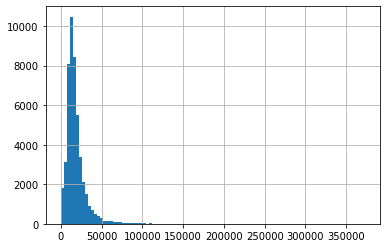

In [ ]:
df['mileage_per_year'].hist(bins=100)

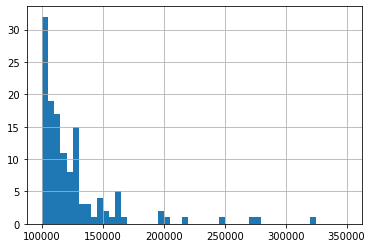

In [ ]:
df['mileage_per_year'].hist(bins=50, range=(100000, 350000))

In [ ]:
df.query('mileage_per_year > 125000').sort_values(by='price', ascending=False)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
220,41800,2018,chevrolet silverado 3500hd,good,8,gas,148459.000000,automatic,truck,black,True,2019-03-19,11,1,148459.000000,2
18346,41800,2018,chevrolet silverado 3500hd,good,8,gas,148459.000000,automatic,truck,black,True,2018-10-13,82,0,148459.000000,2
36372,41800,2018,chevrolet silverado 3500hd,good,8,gas,148459.000000,automatic,truck,black,True,2018-10-04,10,0,148459.000000,2
26139,41800,2018,chevrolet silverado 3500hd,good,8,gas,148459.000000,automatic,truck,black,True,2018-11-30,62,0,148459.000000,2
48962,40000,2014,ram 3500,excellent,8,diesel,980000.000000,automatic,truck,white,True,2018-12-06,7,4,245000.000000,3
4049,34995,2017,gmc sierra 2500hd,excellent,8,gas,164409.000000,automatic,pickup,red,True,2018-10-05,68,1,164409.000000,3
49813,33950,2017,ford f-250,good,8,diesel,143905.000000,automatic,pickup,white,True,2018-06-22,38,1,143905.000000,2
42747,32800,2019,ford ranger,good,4,gas,151604.273743,automatic,truck,white,True,2019-01-11,27,0,151604.273743,2
5459,29995,2017,gmc sierra 2500hd,excellent,8,gas,164409.000000,automatic,pickup,red,True,2018-11-25,24,1,164409.000000,3
3754,29995,2017,gmc sierra 2500hd,excellent,8,gas,164409.000000,automatic,pickup,red,True,2018-11-04,37,1,164409.000000,3


In [ ]:
125000/356/60 #6 hours a day driving at 60 mph, some people do do that

5.8520599250936325

In [ ]:
too_far = df.query('mileage_per_year > 125000')
mileage_too_high = []
for i in range(len(too_far)):
  group = listing_group(['model_year', 'model'], too_far.iloc[i], df)
  IQR = group['mileage_per_year'].quantile(.75) - group['mileage_per_year'].quantile(.25)
  ceil = group['mileage_per_year'].quantile(.75) + (1.5*IQR)
  if too_far.iloc[i]['mileage_per_year'] > ceil:
    mileage_too_high.append(too_far.index[i])

df.loc[mileage_too_high]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
2840,18500,2014,ford explorer,excellent,6,gas,866000.000000,automatic,SUV,black,True,2018-07-20,14,4,216500.0,3
3267,11900,2017,chevrolet equinox,good,4,gas,125015.000000,automatic,SUV,white,False,2018-10-22,51,1,125015.0,2
3754,29995,2017,gmc sierra 2500hd,excellent,8,gas,164409.000000,automatic,pickup,red,True,2018-11-04,37,1,164409.0,3
4049,34995,2017,gmc sierra 2500hd,excellent,8,gas,164409.000000,automatic,pickup,red,True,2018-10-05,68,1,164409.0,3
4970,29000,2018,chevrolet silverado 1500,excellent,8,gas,373200.000000,automatic,truck,green,True,2018-09-14,40,0,373200.0,3
5459,29995,2017,gmc sierra 2500hd,excellent,8,gas,164409.000000,automatic,pickup,red,True,2018-11-25,24,1,164409.0,3
5735,7500,2015,hyundai elantra,excellent,4,gas,813542.000000,other,coupe,brown,False,2018-11-21,5,3,271180.7,3
9117,2800,2015,chevrolet malibu,excellent,4,gas,406360.000000,automatic,sedan,white,False,2018-12-11,20,3,135453.3,3
9224,1500,2018,ford f-150,excellent,6,gas,150000.000000,automatic,truck,white,False,2019-02-05,32,1,150000.0,3
9742,12500,2018,nissan altima,like new,4,gas,320000.000000,automatic,sedan,silver,False,2018-08-14,75,0,320000.0,4


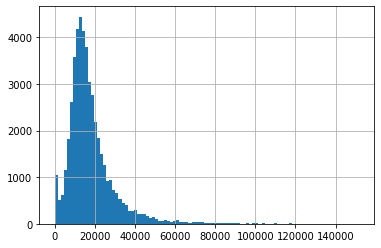

In [ ]:
df = df.drop(index=mileage_too_high)
df['mileage_per_year'].hist(bins=100)

In [ ]:
df.corr(method='pearson') #corellations with price have increased

,price,model_year,cylinders,odometer,is_4wd,days_listed,vehicle_age,mileage_per_year,condition_id
price,1.000000,0.513610,0.337183,-0.500092,0.358186,-0.001132,-0.512048,0.269282,0.256516
model_year,0.513610,1.000000,-0.173287,-0.496973,0.032235,-0.005459,-0.997185,0.498377,0.280772
cylinders,0.337183,-0.173287,1.000000,0.122580,0.405804,0.006056,0.172907,-0.047724,-0.078964
odometer,-0.500092,-0.496973,0.122580,1.000000,0.046162,0.003943,0.495305,0.062116,-0.292391
is_4wd,0.358186,0.032235,0.405804,0.046162,1.000000,0.003615,-0.032334,0.055399,0.010978
days_listed,-0.001132,-0.005459,0.006056,0.003943,0.003615,1.000000,0.006331,-0.000258,0.000298
vehicle_age,-0.512048,-0.997185,0.172907,0.495305,-0.032334,0.006331,1.000000,-0.506975,-0.279763
mileage_per_year,0.269282,0.498377,-0.047724,0.062116,0.055399,-0.000258,-0.506975,1.000000,0.085328
condition_id,0.256516,0.280772,-0.078964,-0.292391,0.010978,0.000298,-0.279763,0.085328,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28ab40ed10>,
      dtype=object)

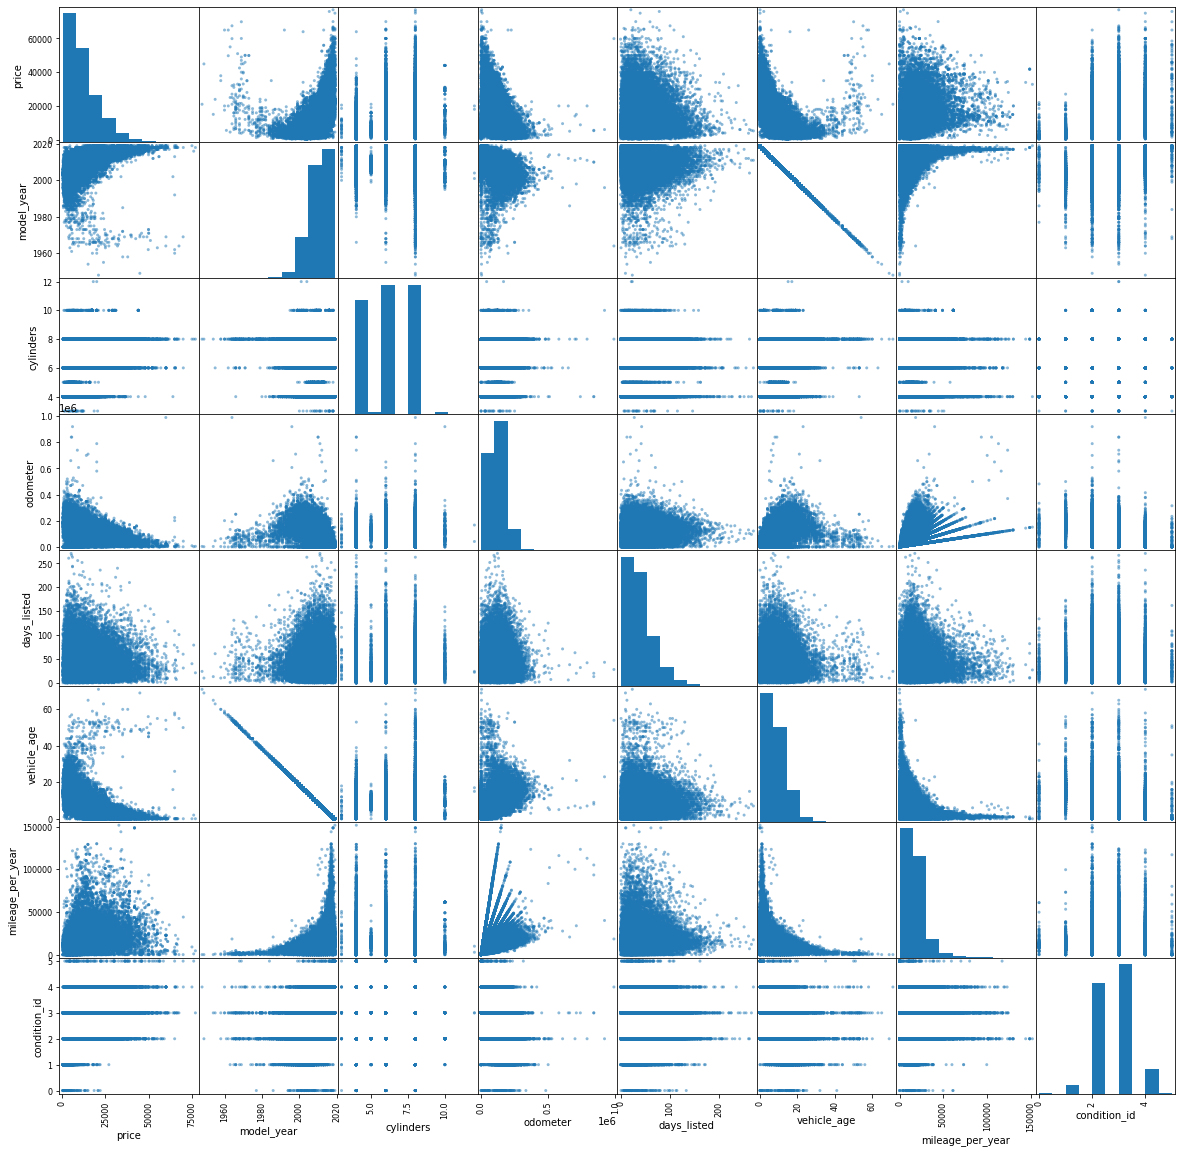

In [ ]:
scatter = df.drop(columns=['is_4wd'])
pd.plotting.scatter_matrix(scatter, figsize=(20, 20))

## Ads lifetime

[Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

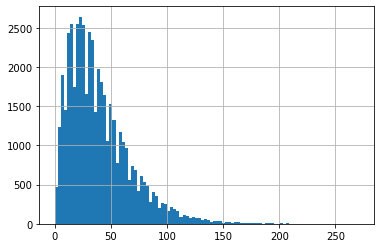

In [ ]:
df['days_listed'].hist(bins=100)

In [ ]:
df['days_listed'].median()

33.0

In [ ]:
df['days_listed'].mean()

39.57776673087678

In [ ]:
x = df['days_listed'].value_counts() > 5
for i in range(len(x)):
  try:
    if x[i] == False:
      print(x.index[i])
      break
  except:
    print()

163


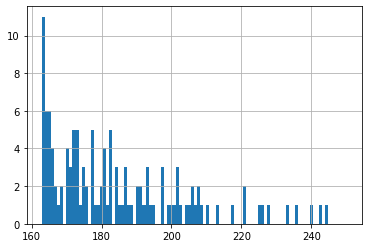

In [ ]:
df['days_listed'].hist(bins=100, range=(163, 250))

In [ ]:
df['days_listed'].describe()

count    48279.000000
mean        39.577767
std         28.272656
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [ ]:
IQR = df['days_listed'].quantile(.75) - df['days_listed'].quantile(.25)
ceil = df['days_listed'].quantile(.75) + (1.5*IQR)
ceil

104.0

In [ ]:
old_listings = df.query('days_listed > @ceil')
old_listings

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
15,17990,2013,ram 1500,excellent,8,gas,94690.842857,automatic,pickup,red,True,2018-05-15,111,5,18938.2,3
34,9500,2008,toyota highlander,good,6,gas,149799.000000,automatic,SUV,grey,False,2018-06-04,121,10,14979.9,2
51,3800,2012,ford focus,good,4,gas,130323.000000,automatic,sedan,black,False,2018-11-29,261,6,21720.5,2
89,18800,2015,chevrolet camaro lt coupe 2d,good,6,gas,33926.000000,other,coupe,grey,False,2019-01-16,152,4,8481.5,2
104,22900,2014,ford f150 supercrew cab xlt,good,6,gas,73711.000000,automatic,pickup,white,True,2019-02-27,141,5,14742.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51368,2775,2007,ford focus,excellent,4,gas,111450.000000,automatic,sedan,silver,False,2018-08-23,141,11,10131.8,3
51374,9700,2010,honda odyssey,good,6,gas,105656.000000,automatic,mini-van,grey,False,2019-01-18,111,9,11739.6,2
51407,5495,2006,jeep liberty,good,6,gas,108388.000000,automatic,wagon,white,True,2018-12-24,106,12,9032.3,2
51489,1200,2005,volkswagen jetta,fair,5,gas,185000.000000,automatic,sedan,grey,False,2018-10-10,158,13,14230.8,1


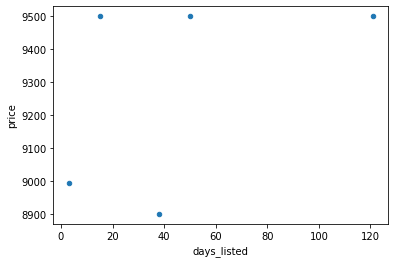

In [ ]:
listing_group(['model_year','model','condition', 'odometer'], df.loc[34], df).plot(kind='scatter', x='days_listed', y='price')

In [ ]:
similar_listings = []
for i in range(len(old_listings)):
  group = listing_group(['model_year', 'model', 'condition', 'odometer'], old_listings.iloc[i], df)
  if len(group) > 70:
    similar_listings.append(old_listings.index[i])

df.loc[similar_listings]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year,condition_id
1630,21000,2018,nissan frontier crew cab sv,good,6,gas,24912.753521,other,pickup,silver,True,2018-05-05,149,0,24912.753521,2
12146,23900,2018,nissan frontier crew cab sv,good,6,gas,24912.753521,other,pickup,white,True,2018-12-02,111,0,24912.753521,2


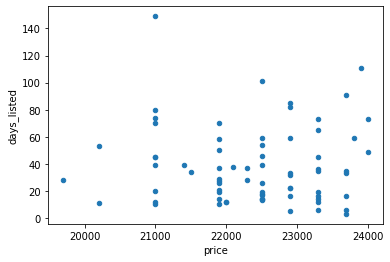

In [ ]:
random_set = df.loc[similar_listings].sample(1)
for i in range(len(random_set)):
  group = listing_group(['model_year', 'model', 'condition', 'odometer'], random_set.iloc[i], df)
  group.plot(kind='scatter', y='days_listed', x='price')


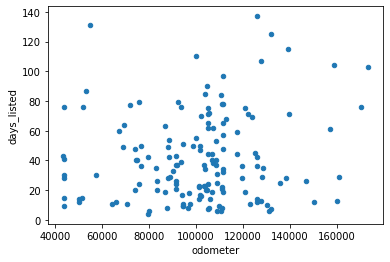

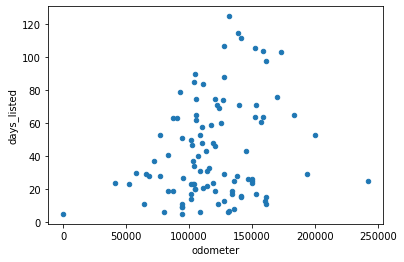

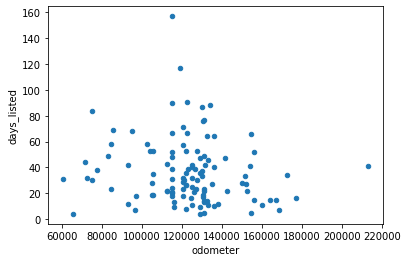

In [ ]:
similar_listings = []
for i in range(len(old_listings)):
  group = listing_group(['price', 'model_year', 'model'], old_listings.iloc[i], df)
  if len(group) > 100:
    similar_listings.append(old_listings.index[i])

random_set = df.loc[similar_listings].sample(3)
for i in range(len(random_set)):
  group = listing_group(['price', 'model_year', 'model'], random_set.iloc[i], df)
  group.plot(kind='scatter', y='days_listed', x='odometer')


In [ ]:
random_set = df.loc[similar_listings].sample(3)
for i in range(len(random_set)):
  group = listing_group(['price', 'model_year', 'model'], random_set.iloc[i], df)
  group.plot(kind='scatter', y='days_listed', x='odometer')


## Average price per each type of vehicle

[Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

## Price factors

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

[Make use of correlation matrix and correlation plots]

## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]